# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# The modules below were created by me. If they are in the /other_scripts
# folder, move them to the same folder as this notebook.
from levels_function import spells_level
from schools_function import school_of_magic
from materials_function import find_materials
from classes_function import separate_classes, class_spells

# Setting the color palette with Seaborn

In [2]:
colors = sns.color_palette("viridis",n_colors=13)
two_colors = sns.color_palette("Spectral",n_colors=2)

# Importing the data and ordering the dataset alphabetically

In [3]:
df = pd.read_excel("D&D 5E Spells.xlsx")
spells = df.sort_values('name').reset_index().drop('index',axis=1)
spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Abi-Dalzim's Horrid Wilting,8,Necromancy,True,True,A bit of sponge,1 action,False,Instantaneous,150 feet,False,You draw the moisture from every creature in a...,False,NaN,"Sorcerer,Wizard",Xanathar's Guide to Everything
1,Absorb Elements,1,Abjuration,False,True,NaN,"1 reaction, which you take when you take acid,...",False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Xanathar's Guide to Everything
2,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"Artificer,Cleric,Paladin",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Wrath of Nature,5,Evocation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,You call out to the spirits of nature to rouse...,False,NaN,"Druid,Ranger",Xanathar's Guide to Everything
515,Wrathful Smite,1,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit with a melee weapon atta...,False,NaN,Paladin,Player's Handbook
516,Wristpocket,2,Conjuration,False,True,NaN,1 action,True,Up to 1 hour,Self,True,"You flick your wrist, causing one object in yo...",False,NaN,Wizard,Explorer's Guide to Wildemount
517,Zephyr Strike,1,Transmutation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,"You move like the wind. Until the spell ends, ...",False,NaN,Ranger,Xanathar's Guide to Everything


## Checking general informations about the dataset

In [4]:
spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           519 non-null    object
 1   level          519 non-null    int64 
 2   school         519 non-null    object
 3   V              519 non-null    bool  
 4   S              519 non-null    bool  
 5   M              277 non-null    object
 6   casting_time   519 non-null    object
 7   concentration  519 non-null    bool  
 8   duration       519 non-null    object
 9   range          519 non-null    object
 10  ritual         519 non-null    bool  
 11  description    519 non-null    object
 12  cast_higher    519 non-null    bool  
 13  higher_levels  172 non-null    object
 14  classes        519 non-null    object
 15  book           519 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 47.3+ KB


## Statistics

### Mean

In [5]:
spells.mean(numeric_only=True)

level            3.579961
V                0.936416
S                0.857418
concentration    0.447013
ritual           0.065511
cast_higher      0.331407
dtype: float64

### Standard deviation

In [6]:
spells.std(numeric_only=True)

level            2.490302
V                0.244245
S                0.349983
concentration    0.497664
ritual           0.247663
cast_higher      0.471173
dtype: float64

### Median

In [7]:
spells.median(numeric_only=True)

level            3.0
V                1.0
S                1.0
concentration    0.0
ritual           0.0
cast_higher      0.0
dtype: float64

### Mode

In [8]:
spells.mode(numeric_only=True)

,level,V,S,concentration,ritual,cast_higher
0,2,True,True,False,False,False


### Correlation

In [9]:
corr_matrix = spells.corr()
corr_matrix

,level,V,S,concentration,ritual,cast_higher
level,1.000000,0.149613,0.033041,0.095719,-0.118063,-0.150959
V,0.149613,1.000000,-0.106261,0.059581,-0.026749,0.049258
S,0.033041,-0.106261,1.000000,0.011959,0.085698,0.041256
concentration,0.095719,0.059581,0.011959,1.000000,-0.144075,0.042100
ritual,-0.118063,-0.026749,0.085698,-0.144075,1.000000,-0.169866
cast_higher,-0.150959,0.049258,0.041256,0.042100,-0.169866,1.000000


<AxesSubplot:>

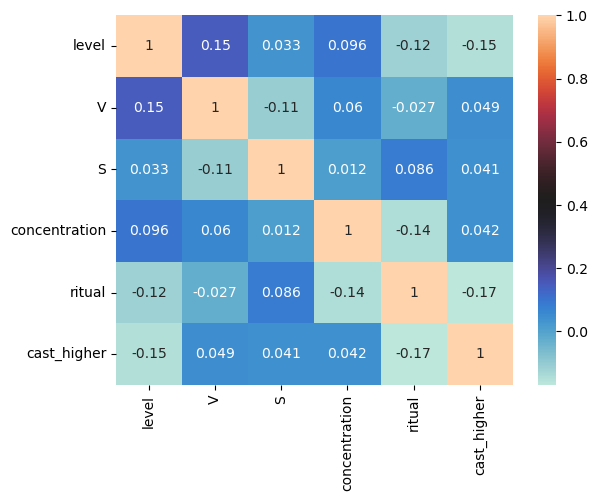

In [10]:
sns.heatmap(corr_matrix, annot=True,
            cmap=sns.color_palette("icefire", as_cmap=True))

# Levels

## Count

In [11]:
levels = spells['level'].value_counts()
levels

2    86
1    79
3    73
5    62
4    51
6    48
0    46
7    28
8    24
9    22
Name: level, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x221258e9730>,
 [Text(0.9542881881688228, 0.5471142969448574, 'Level 2'),
  Text(0.05657210213420746, 1.0985443082826094, 'Level 1'),
  Text(-0.8397886966880408, 0.7104610790993423, 'Level 3'),
  Text(-1.0927329876142324, -0.12623239591988247, 'Level 5'),
  Text(-0.7671521009275982, -0.7883385402492843, 'Level 4'),
  Text(-0.18882689257724958, -1.0836717236504883, 'Level 6'),
  Text(0.4247934731547919, -1.0146676821329679, 'Cantrips'),
  Text(0.8223420529741191, -0.730584387945918, 'Level 7'),
  Text(1.0081233424226541, -0.4400992234287359, 'Level 8'),
  Text(1.090260616286793, -0.14605406045003605, 'Level 9')],
 [Text(0.5205208299102669, 0.2984259801517403, '16.57%'),
  Text(0.030857510255022244, 0.5992059863359688, '15.22%'),
  Text(-0.4580665618298404, 0.3875242249632776, '14.07%'),
  Text(-0.5960361750623085, -0.0688540341381177, '11.95%'),
  Text(-0.4184466005059626, -0.4300028401359732, '9.83%'),
  Text(-0.10299648686031794, -0.5910936674457208, '9

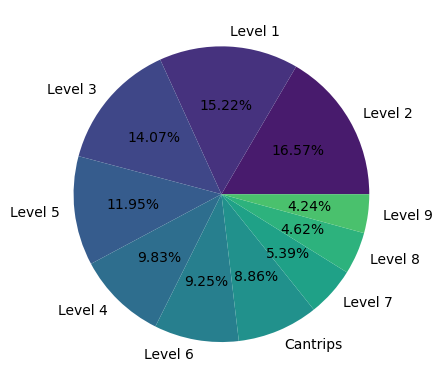

In [12]:
levels_labels = ['Level 2','Level 1','Level 3','Level 5','Level 4','Level 6',
                 'Cantrips','Level 7','Level 8','Level 9']

plt.pie(levels, labels=levels_labels, colors=colors, autopct='%1.2f%%')

## Cantrips

In [13]:
cantrips = spells_level(spells,0)
cantrips

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
2,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
38,Blade Ward,0,Abjuration,True,True,NaN,1 action,False,1 round,Self,False,You extend your hand and trace a sigil of ward...,False,NaN,"Bard,Sorcerer,Warlock,Wizard",Player's Handbook
47,Booming Blade,0,Evocation,False,True,A melee weapon worth at least 1 sp,1 action,False,1 round,Self (5-foot radius),False,You brandish the weapon used in the spell's ca...,False,NaN,"Artificer,Sorcerer,Warlock,Wizard",Tasha's Cauldron of Everything
61,Chill Touch,0,Necromancy,True,True,NaN,1 action,False,1 round,120 feet,False,"You create a ghostly, skeletal hand in the spa...",False,NaN,"Sorcerer,Warlock,Wizard",Player's Handbook
90,Control Flames,0,Transmutation,False,True,NaN,1 action,False,Instantaneous or 1 hour (see description),60 feet,False,You choose a nonmagical flame that you can see...,False,NaN,"Druid,Sorcerer,Wizard",Xanathar's Guide to Everything
96,Create Bonfire,0,Conjuration,True,True,NaN,1 action,True,Up to 1 minute,60 feet,False,You create a bonfire on ground that you can se...,False,NaN,"Artificer,Druid,Sorcerer,Warlock,Wizard",Xanathar's Guide to Everything
108,Dancing Lights,0,Evocation,True,True,"A bit of phosphorus or wychwood, or a glowworm",1 action,True,Up to 1 minute,120 feet,False,You create up to four torch-sized lights withi...,False,NaN,"Artificer,Bard,Sorcerer,Wizard",Player's Handbook
142,Druidcraft,0,Transmutation,True,True,NaN,1 action,False,Instantaneous,30 feet,False,"Whispering to the spirits of nature, you creat...",False,NaN,Druid,Player's Handbook
147,Eldritch Blast,0,Evocation,True,True,NaN,1 action,False,Instantaneous,120 feet,False,A beam of crackling energy streaks toward a cr...,False,NaN,Warlock,Player's Handbook
150,Encode Thoughts,0,Enchantment,False,True,NaN,1 action,False,8 hours,Self,False,"You pull a memory, an idea, or a message from ...",False,NaN,Wizard,Guildmaster's Guide to Ravnica


In [14]:
cantrips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 2 to 512
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           46 non-null     object
 1   level          46 non-null     int64 
 2   school         46 non-null     object
 3   V              46 non-null     bool  
 4   S              46 non-null     bool  
 5   M              13 non-null     object
 6   casting_time   46 non-null     object
 7   concentration  46 non-null     bool  
 8   duration       46 non-null     object
 9   range          46 non-null     object
 10  ritual         46 non-null     bool  
 11  description    46 non-null     object
 12  cast_higher    46 non-null     bool  
 13  higher_levels  0 non-null      object
 14  classes        46 non-null     object
 15  book           46 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 4.5+ KB


## First level

In [15]:
first_level = spells_level(spells,1)
first_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
1,Absorb Elements,1,Abjuration,False,True,NaN,"1 reaction, which you take when you take acid,...",False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Xanathar's Guide to Everything
6,Alarm,1,Abjuration,True,True,A tiny bell and a piece of fine silver wire,1 minute,False,8 hours,30 feet,True,You set an alarm against unwanted intrusion. C...,False,NaN,"Artificer,Ranger,Wizard",Player's Handbook
8,Animal Friendship,1,Enchantment,True,True,A morsel of food,1 action,False,24 hours,30 feet,False,This spell lets you convince a beast that you ...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Ranger",Player's Handbook
19,Armor of Agathys,1,Abjuration,True,True,A cup of water,1 action,False,1 hour,Self,False,"A protective magical force surrounds you, mani...",True,When you cast this spell using a spell slot of...,Warlock,Player's Handbook
20,Arms of Hadar,1,Conjuration,True,True,NaN,1 action,False,Instantaneous,Self (10-foot radius),False,"You invoke the power of Hadar, the Dark Hunger...",True,When you cast this spell using a spell slot of...,Warlock,Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Thunderwave,1,Evocation,True,True,NaN,1 action,False,Instantaneous,Self (15-foot cube),False,A wave of thunderous foree sweeps out from you...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Sorcerer,Wizard",Player's Handbook
486,Unseen Servant,1,Conjuration,True,True,A piece of string and a bit of wood,1 action,False,1 hour,60 feet,True,"This spell creates an invisible, mindless, sha...",False,NaN,"Bard,Warlock,Wizard",Player's Handbook
510,Witch Bolt,1,Evocation,True,True,A twig from a tree that has been struck by lig...,1 action,True,Up to 1 minute,30 feet,False,"A beam of crackling, blue energy lances out to...",True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook
515,Wrathful Smite,1,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit with a melee weapon atta...,False,NaN,Paladin,Player's Handbook


In [16]:
first_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1 to 517
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           79 non-null     object
 1   level          79 non-null     int64 
 2   school         79 non-null     object
 3   V              79 non-null     bool  
 4   S              79 non-null     bool  
 5   M              36 non-null     object
 6   casting_time   79 non-null     object
 7   concentration  79 non-null     bool  
 8   duration       79 non-null     object
 9   range          79 non-null     object
 10  ritual         79 non-null     bool  
 11  description    79 non-null     object
 12  cast_higher    79 non-null     bool  
 13  higher_levels  42 non-null     object
 14  classes        79 non-null     object
 15  book           79 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 7.8+ KB


## Second level

In [17]:
second_level = spells_level(spells,2)
second_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"Artificer,Cleric,Paladin",Player's Handbook
5,Air Bubble,2,Conjuration,False,True,NaN,1 action,False,24 hours,60 feet,False,You create a spectral globe around the head of...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Astral Adventurer's Guide
7,Alter Self,2,Transmutation,True,True,NaN,1 action,True,Up to 1 hour,Self,False,You assume a different form. When you cast the...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
9,Animal Messenger,2,Enchantment,True,True,A morsel of food,1 action,False,24 hours,30 feet,True,"By means of this spell, you use an animal to d...",True,If you cast this spell using a spell slot of 3...,"Bard,Druid,Ranger",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,Warding Wind,2,Evocation,True,False,NaN,1 action,True,Up to 10 minutes,Self,False,A strong wind (20 miles per hour) blows around...,False,NaN,"Bard,Druid,Sorcerer",Xanathar's Guide to Everything
504,Web,2,Conjuration,True,True,A bit of spiderweb,1 action,True,Up to 1 hour,60 feet,False,"You conjure a mass of thick, sticky webbing at...",False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
511,Wither and Bloom,2,Necromancy,True,True,A withered vine twisted into a loop,1 action,False,Instantaneous,60 feet,False,You invoke both death and life upon a 10-foot-...,True,When you cast this spell using a spell slot of...,"Druid,Sorcerer,Wizard",Strixhaven: A Curriculum of Chaos
516,Wristpocket,2,Conjuration,False,True,NaN,1 action,True,Up to 1 hour,Self,True,"You flick your wrist, causing one object in yo...",False,NaN,Wizard,Explorer's Guide to Wildemount


In [18]:
second_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 3 to 518
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           86 non-null     object
 1   level          86 non-null     int64 
 2   school         86 non-null     object
 3   V              86 non-null     bool  
 4   S              86 non-null     bool  
 5   M              51 non-null     object
 6   casting_time   86 non-null     object
 7   concentration  86 non-null     bool  
 8   duration       86 non-null     object
 9   range          86 non-null     object
 10  ritual         86 non-null     bool  
 11  description    86 non-null     object
 12  cast_higher    86 non-null     bool  
 13  higher_levels  34 non-null     object
 14  classes        86 non-null     object
 15  book           86 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 8.5+ KB


## Third level

In [19]:
third_level = spells_level(spells,3)
third_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
11,Animate Dead,3,Necromancy,True,True,"A drop of blood, a piece of flesh, and a pinch...",1 minute,False,Instantaneous,10 feet,False,This spell creates an undead servant. Choose a...,True,When you cast this spell using a spell slot of...,"Cleric,Wizard",Player's Handbook
21,Ashardalon's Stride,3,Transmutation,True,True,NaN,1 bonus action,True,Up to 1 minute,Self,False,The billowing flames of a dragon blast from yo...,True,When you cast this spell using a spell slot of...,"Artificer,Ranger,Sorcerer,Wizard",Fizban's Treasury of Dragons
26,Aura of Vitality,3,Evocation,True,False,NaN,1 action,True,Up to 1 minute,Self (30-foot radius),False,Healing energy radiates from you in an aura wi...,False,NaN,Paladin,Player's Handbook
32,Beacon of Hope,3,Abjuration,True,True,NaN,1 action,True,Up to 1 minute,30 feet,False,This spell bestows hope and vitality. Choose a...,False,NaN,Cleric,Player's Handbook
35,Bestow Curse,3,Necromancy,True,True,NaN,1 action,True,Up to 1 minute,Touch,False,"You touch a creature, and that creature must s...",True,If you cast this spell using a spell slot of 4...,"Bard,Cleric,Wizard",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Wall of Sand,3,Evocation,True,True,A handful of sand,1 action,True,Up to 10 minutes,90 feet,False,You create a wall of swirling sand on the grou...,False,NaN,Wizard,Xanathar's Guide to Everything
498,Wall of Water,3,Evocation,True,True,A drop of water,1 action,True,Up to 10 minutes,60 feet,False,You create a wall of water on the ground at a ...,False,NaN,"Druid,Sorcerer,Wizard",Xanathar's Guide to Everything
501,Water Breathing,3,Transmutation,True,True,A short reed or piece of straw,1 action,False,24 hours,30 feet,True,This spell grants up to ten willing creatures ...,False,NaN,"Artificer,Druid,Ranger,Sorcerer,Wizard",Player's Handbook
502,Water Walk,3,Transmutation,True,True,A piece of cork,1 action,False,1 hour,30 feet,True,This spell grants the ability to move across a...,False,NaN,"Artificer,Cleric,Druid,Ranger,Sorcerer",Player's Handbook


In [20]:
third_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 11 to 508
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           73 non-null     object
 1   level          73 non-null     int64 
 2   school         73 non-null     object
 3   V              73 non-null     bool  
 4   S              73 non-null     bool  
 5   M              40 non-null     object
 6   casting_time   73 non-null     object
 7   concentration  73 non-null     bool  
 8   duration       73 non-null     object
 9   range          73 non-null     object
 10  ritual         73 non-null     bool  
 11  description    73 non-null     object
 12  cast_higher    73 non-null     bool  
 13  higher_levels  35 non-null     object
 14  classes        73 non-null     object
 15  book           73 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 7.2+ KB


## Fourth level

In [21]:
fourth_level = spells_level(spells,4)
fourth_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
16,Arcane Eye,4,Divination,True,True,A bit of bat fur,1 action,True,Up to 1 hour,30 feet,False,"You create an invisible, magical eye within ra...",False,NaN,"Artificer,Wizard",Player's Handbook
24,Aura of Life,4,Abjuration,True,False,NaN,1 action,True,Up to 10 minutes,Self (30-foot radius),False,Life-preserving energy radiates from you in an...,False,NaN,Paladin,Player's Handbook
25,Aura of Purity,4,Abjuration,True,False,NaN,1 action,True,Up to 10 minutes,Self (30-foot radius),False,Purifying energy radiates from you in an aura ...,False,NaN,Paladin,Player's Handbook
30,Banishment,4,Abjuration,True,True,An item distasteful to the target,1 action,True,Up to 1 minute,60 feet,False,You attempt to send one creature that you can ...,True,When you cast this spell using a spell slot of...,"Cleric,Paladin,Sorcerer,Warlock,Wizard",Player's Handbook
41,Blight,4,Necromancy,True,True,NaN,1 action,False,Instantaneous,30 feet,False,Necromantic energy washes over a creature of y...,True,When you cast this spell using a spell slot of...,"Druid,Sorcerer,Warlock,Wizard",Player's Handbook
59,Charm Monster,4,Enchantment,True,True,NaN,1 action,False,1 hour,30 feet,False,You attempt to charm a creature you can see wi...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Sorcerer,Warlock,Wizard",Xanathar's Guide to Everything
75,Compulsion,4,Enchantment,True,True,NaN,1 action,True,Up to 1 minute,30 feet,False,Creatures of your choice that you can see with...,False,NaN,Bard,Player's Handbook
77,Confusion,4,Enchantment,True,True,Three nut shells,1 action,True,Up to 1 minute,90 feet,False,This spell assaults and twists creatures' mind...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Sorcerer,Wizard",Player's Handbook
83,Conjure Minor Elementals,4,Conjuration,True,True,NaN,1 minute,True,Up to 1 hour,90 feet,False,You summon elementals that appear in unoccupie...,True,When you cast this spell using certain higher-...,"Druid,Wizard",Player's Handbook
85,Conjure Woodland Beings,4,Conjuration,True,True,One holy berry per creature summoned,1 action,True,Up to 1 hour,60 feet,False,You summon fey creatures that appear in unoccu...,True,When you cast this spell using certain higher-...,"Druid,Ranger",Player's Handbook


In [22]:
fourth_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 16 to 503
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           51 non-null     object
 1   level          51 non-null     int64 
 2   school         51 non-null     object
 3   V              51 non-null     bool  
 4   S              51 non-null     bool  
 5   M              29 non-null     object
 6   casting_time   51 non-null     object
 7   concentration  51 non-null     bool  
 8   duration       51 non-null     object
 9   range          51 non-null     object
 10  ritual         51 non-null     bool  
 11  description    51 non-null     object
 12  cast_higher    51 non-null     bool  
 13  higher_levels  21 non-null     object
 14  classes        51 non-null     object
 15  book           51 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 5.0+ KB


## Fifth level

In [23]:
fifth_level = spells_level(spells,5)
fifth_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
12,Animate Objects,5,Transmutation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,Objects come to life at your command. Choose u...,True,If you cast this spell using a spell slot of 6...,"Artificer,Bard,Sorcerer,Wizard",Player's Handbook
13,Antilife Shell,5,Abjuration,True,True,NaN,1 action,True,Up to 1 hour,Self (10-foot radius),False,A shimmering barrier extends out from you in a...,False,NaN,Druid,Player's Handbook
27,Awaken,5,Transmutation,True,True,"An agate worth at least 1000 gp, which the spe...",8 hours,False,Instantaneous,Touch,False,After spending the casting time tracing magica...,False,NaN,"Bard,Druid",Player's Handbook
29,Banishing Smite,5,Abjuration,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a weapon...,False,NaN,Paladin,Player's Handbook
36,Bigby's Hand,5,Evocation,True,True,An eggshell and a snakeskin glove,1 action,True,Up to 1 minute,120 feet,False,"You create a Large hand of shimmering, translu...",True,When you cast this spell using a spell slot of...,"Artificer,Wizard",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Tree Stride,5,Conjuration,True,True,NaN,1 action,True,Up to 1 minute,Self,False,You gain the ability to enter a tree and move ...,False,NaN,"Druid,Ranger",Player's Handbook
492,Wall of Force,5,Evocation,True,True,A pinch of powder made by crushing a clear gem...,1 action,True,Up to 10 minutes,120 feet,False,An invisible wall of force springs into existe...,False,NaN,Wizard,Player's Handbook
494,Wall of Light,5,Evocation,True,True,A hand mirror,1 action,True,Up to 10 minutes,120 feet,False,A shimmering wall of bright Light appears at a...,True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Xanathar's Guide to Everything
496,Wall of Stone,5,Evocation,True,True,A small block of granite,1 action,True,Up to 10 minutes,120 feet,False,A nonmagical wall of solid stone springs into ...,False,NaN,"Artificer,Druid,Sorcerer,Wizard",Player's Handbook


In [24]:
fifth_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 12 to 514
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           62 non-null     object
 1   level          62 non-null     int64 
 2   school         62 non-null     object
 3   V              62 non-null     bool  
 4   S              62 non-null     bool  
 5   M              35 non-null     object
 6   casting_time   62 non-null     object
 7   concentration  62 non-null     bool  
 8   duration       62 non-null     object
 9   range          62 non-null     object
 10  ritual         62 non-null     bool  
 11  description    62 non-null     object
 12  cast_higher    62 non-null     bool  
 13  higher_levels  21 non-null     object
 14  classes        62 non-null     object
 15  book           62 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 6.1+ KB


## Sixth level

In [25]:
sixth_level = spells_level(spells,6)
sixth_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
17,Arcane Gate,6,Conjuration,True,True,NaN,1 action,True,Up to 10 minutes,500 feet,False,You create linked teleportation portals that r...,False,NaN,"Sorcerer,Warlock,Wizard",Player's Handbook
37,Blade Barrier,6,Evocation,True,True,NaN,1 action,True,Up to 10 minutes,90 feet,False,"You create a vertical wall of whirling, razor-...",False,NaN,Cleric,Player's Handbook
46,Bones of the Earth,6,Transmutation,True,True,NaN,1 action,False,Instantaneous,120 feet,False,You cause up to six pillars of stone to burst ...,True,When you cast this spell using a spell slot of...,Druid,Xanathar's Guide to Everything
57,Chain Lightning,6,Evocation,True,True,"A bit of fur; a piece of amber, glass, or a cr...",1 action,False,Instantaneous,150 feet,False,You create a bolt of lightning that arcs towar...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Player's Handbook
63,Circle of Death,6,Necromancy,True,True,The powder of a crushed black pearl worth at l...,1 action,False,Instantaneous,150 feet,False,A sphere of negative energy ripples out in a 6...,True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook
82,Conjure Fey,6,Conjuration,True,True,NaN,1 minute,True,Up to 1 hour,90 feet,False,You summon a fey creature of challenge rating ...,True,When you cast this spell using a spell slot of...,"Druid,Warlock",Player's Handbook
88,Contigency,6,Evocation,True,True,A statuette of yourself carved from ivory and ...,10 minutes,False,10 days,Self,False,Choose a spell of 5th level or lower that you ...,False,NaN,Wizard,Player's Handbook
98,Create Homunculus,6,Transmutation,True,True,"Clay, ash, and mandrake root, all of which the...",1 hour,False,Instantaneous,Touch,False,"While speaking an intricate incantation, you c...",False,NaN,Wizard,Xanathar's Guide to Everything
101,Create Undead,6,Necromancy,True,True,"One clay pot tilled with grave dirt, one clay ...",1 minute,False,Instantaneous,10 feet,False,You can cast this spell only at night. Choose ...,True,When you cast this spell using a 7th-level spe...,"Cleric,Warlock,Wizard",Player's Handbook
125,Disintegrate,6,Transmutation,True,True,A lodestone and a pinch of dust,1 action,False,Instantaneous,60 feet,False,A thin green ray springs from your pointing fi...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Player's Handbook


In [26]:
sixth_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 17 to 513
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           48 non-null     object
 1   level          48 non-null     int64 
 2   school         48 non-null     object
 3   V              48 non-null     bool  
 4   S              48 non-null     bool  
 5   M              30 non-null     object
 6   casting_time   48 non-null     object
 7   concentration  48 non-null     bool  
 8   duration       48 non-null     object
 9   range          48 non-null     object
 10  ritual         48 non-null     bool  
 11  description    48 non-null     object
 12  cast_higher    48 non-null     bool  
 13  higher_levels  14 non-null     object
 14  classes        48 non-null     object
 15  book           48 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 4.7+ KB


## Seventh level

In [27]:
seventh_level = spells_level(spells,7)
seventh_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
80,Conjure Celestial,7,Conjuration,True,True,NaN,1 minute,True,Up to 1 hour,90 feet,False,You summon a celestial of challenge rating 4 o...,True,When you cast this spell using a 9th-level spe...,Cleric,Player's Handbook
99,Create Magen,7,Transmutation,True,True,A vial of quicksilver worth 500 gp and a life-...,1 hour,False,Instantaneous,Touch,False,"While casting the spell, you place a vial of q...",False,NaN,Wizard,Icewind Dale: Rime of the Frostmaiden
105,Crown of Stars,7,Evocation,True,True,NaN,1 action,False,1 hour,Self,False,Seven star-like motes of light appear and orbi...,True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Xanathar's Guide to Everything
116,Delayed Blast Fireball,7,Evocation,True,True,A tiny ball of bat guano and sulfur,1 action,True,Up to 1 minute,150 feet,False,A beam of yellow light flashes from your point...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Player's Handbook
132,Divine Word,7,Evocation,True,False,NaN,1 bonus action,False,Instantaneous,30 feet,False,"You utter a divine word, imbued with the power...",False,NaN,Cleric,Player's Handbook
136,Draconic Transformation,7,Transmutation,True,True,"A statuette of a dragon, worth at least 500 gp",1 bonus action,True,Up to 1 minute,Self,False,"With a roar, you draw on the magic of dragons ...",False,NaN,"Druid,Sorcerer,Wizard",Fizban's Treasury of Dragons
140,Dream of the Blue Veil,7,Conjuration,True,True,A magic item or a willing creature from the de...,10 minutes,False,6 hours,20 feet,False,You and up to eight willing creatures within r...,False,NaN,"Bard,Sorcerer,Warlock,Wizard",Tasha's Cauldron of Everything
159,Etherealness,7,Transmutation,True,True,NaN,1 action,False,Up to 8 hours,Self,False,You step into the border regions of the Ethere...,True,When you cast this spell using a spell slot of...,"Bard,Cleric,Sorcerer,Warlock,Wizard",Player's Handbook
177,Finger of Death,7,Necromancy,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You send negative energy coursing through a cr...,False,NaN,"Sorcerer,Warlock,Wizard",Player's Handbook
180,Fire Storm,7,Evocation,True,True,NaN,1 action,False,Instantaneous,150 feet,False,A storm made up of sheets of roaring flame app...,False,NaN,"Cleric,Druid,Sorcerer",Player's Handbook


In [28]:
seventh_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 80 to 506
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           28 non-null     object
 1   level          28 non-null     int64 
 2   school         28 non-null     object
 3   V              28 non-null     bool  
 4   S              28 non-null     bool  
 5   M              18 non-null     object
 6   casting_time   28 non-null     object
 7   concentration  28 non-null     bool  
 8   duration       28 non-null     object
 9   range          28 non-null     object
 10  ritual         28 non-null     bool  
 11  description    28 non-null     object
 12  cast_higher    28 non-null     bool  
 13  higher_levels  4 non-null      object
 14  classes        28 non-null     object
 15  book           28 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 2.8+ KB


## Eighth level

In [29]:
eighth_level = spells_level(spells,8)
eighth_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Abi-Dalzim's Horrid Wilting,8,Necromancy,True,True,A bit of sponge,1 action,False,Instantaneous,150 feet,False,You draw the moisture from every creature in a...,False,NaN,"Sorcerer,Wizard",Xanathar's Guide to Everything
10,Animal Shapes,8,Transmutation,True,True,NaN,1 action,True,Up to 24 hours,30 feet,False,Your magic turns others into beasts. Choose an...,False,NaN,Druid,Player's Handbook
14,Antimagic Field,8,Abjuration,True,True,A pinch of powdered iron or iron fillings,1 action,True,Up to 1 hour,Self (10-foot radius sphere),False,A 10-foot-radius invisible sphere of antimagic...,False,NaN,"Cleric,Wizard",Player's Handbook
15,Antipathy/Sympathy,8,Enchantment,True,True,Either a lump of alum soaked in vinegar for th...,1 hour,False,10 days,60 feet,False,This spell attracts or repels creatures of you...,False,NaN,"Druid,Wizard",Player's Handbook
66,Clone,8,Necromancy,True,True,A diamond worth at least 1000 gp and at least ...,1 hour,False,Instantaneous,Touch,False,This spell grows an inert duplicate of a livin...,False,NaN,Wizard,Player's Handbook
92,Control Weather,8,Transmutation,True,True,Burning incense and bits of earth and wood mix...,10 minutes,True,Up to 8 hours,Self (5-mile radius),False,You take control of the weather within 5 miles...,False,NaN,"Cleric,Druid,Wizard",Player's Handbook
110,Dark Star,8,Evocation,True,True,A shard of onyx and a drop of the caster's blo...,1 action,True,Up to 1 minute,150 feet,False,This spell creates a sphere centered on a poin...,False,NaN,Wizard,Explorer's Guide to Wildemount
117,Demiplane,8,Conjuration,False,True,NaN,1 action,False,1 hour,60 feet,False,You create a shadowy door on a flat solid surf...,False,NaN,"Warlock,Wizard",Player's Handbook
134,Dominate Monster,8,Enchantment,True,True,NaN,1 action,True,Up to 1 hour,60 feet,False,You attempt to beguile a creature that you can...,True,When you cast this spell with a 9th-level spel...,"Bard,Sorcerer,Warlock,Wizard",Player's Handbook
146,Earthquake,8,Evocation,True,True,"A pinch of dirt, a piece of rock, and a lump o...",1 action,True,Up to 1 minute,500 feet,False,You create a seismic disturbance at a point on...,False,NaN,"Cleric,Druid,Sorcerer",Player's Handbook


In [30]:
eighth_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 485
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           24 non-null     object
 1   level          24 non-null     int64 
 2   school         24 non-null     object
 3   V              24 non-null     bool  
 4   S              24 non-null     bool  
 5   M              14 non-null     object
 6   casting_time   24 non-null     object
 7   concentration  24 non-null     bool  
 8   duration       24 non-null     object
 9   range          24 non-null     object
 10  ritual         24 non-null     bool  
 11  description    24 non-null     object
 12  cast_higher    24 non-null     bool  
 13  higher_levels  1 non-null      object
 14  classes        24 non-null     object
 15  book           24 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 2.4+ KB


## Ninth level

In [31]:
ninth_level = spells_level(spells,9)
ninth_level

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
22,Astral Projection,9,Necromancy,True,True,"For each creature you affect with this spell, ...",1 hour,False,Special,10 feet,False,You and up to eight willing creatures within r...,False,NaN,"Cleric,Warlock,Wizard",Player's Handbook
39,Blade of Disaster,9,Conjuration,True,True,NaN,1 bonus action,True,Up to 1 minute,60 feet,False,You create a blade-shaped planar rift about 3 ...,False,NaN,"Sorcerer,Warlock,Wizard",Tasha's Cauldron of Everything
193,Foresight,9,Divination,True,True,A hummingbird feather,1 minute,False,8 hours,Touch,False,You touch a willing creature and bestow a limi...,False,NaN,"Bard,Druid,Warlock,Wizard",Player's Handbook
202,Gate,9,Conjuration,True,True,A diamond worth at least 5000 gp,1 action,True,Up to 1 minute,60 feet,False,You conjure a portal linking an unoccupied spa...,False,NaN,"Cleric,Sorcerer,Wizard",Player's Handbook
253,Imprisonment,9,Abjuration,True,True,A vellum depiction or a carved statuette in lh...,1 minute,False,Until dispelled,30 feet,False,You create a magical restraint to hold a creat...,False,NaN,"Warlock,Wizard",Player's Handbook
266,Invulnerability,9,Abjuration,True,True,A small piece of adamantine worth at least 500...,1 action,True,Up to 10 minutes,Self,False,You are immune to all damage until the spell e...,False,NaN,Wizard,Xanathar's Guide to Everything
299,Mass Heal,9,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,A flood of healing energy flows from you into ...,False,NaN,Cleric,Player's Handbook
301,Mass Polymorph,9,Transmutation,True,True,A caterpillar cocoon,1 action,True,Up to 1 hour,120 feet,False,You transform up to ten creatures of your choi...,False,NaN,"Bard,Sorcerer,Wizard",Xanathar's Guide to Everything
311,Meteor Swarm,9,Evocation,True,True,NaN,1 action,False,Instantaneous,1 mile,False,Blazing orbs of fire plummet to the ground at ...,False,NaN,"Sorcerer,Wizard",Player's Handbook
348,Power Word Heal,9,Evocation,True,False,NaN,1 action,False,Instantaneous,Touch,False,A wave of healing energy washes over the creat...,False,NaN,Bard,Player's Handbook


In [32]:
ninth_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 22 to 509
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           22 non-null     object
 1   level          22 non-null     int64 
 2   school         22 non-null     object
 3   V              22 non-null     bool  
 4   S              22 non-null     bool  
 5   M              11 non-null     object
 6   casting_time   22 non-null     object
 7   concentration  22 non-null     bool  
 8   duration       22 non-null     object
 9   range          22 non-null     object
 10  ritual         22 non-null     bool  
 11  description    22 non-null     object
 12  cast_higher    22 non-null     bool  
 13  higher_levels  0 non-null      object
 14  classes        22 non-null     object
 15  book           22 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 2.2+ KB


# Schools of magic

## Count

In [33]:
schools = spells['school'].value_counts()
schools

Evocation        107
Transmutation    103
Conjuration       98
Abjuration        52
Enchantment       50
Necromancy        41
Divination        35
Illusion          33
Name: school, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x221259cd070>,
 [Text(0.8772285138394955, 0.6636792406780176, 'Evocation'),
  Text(-0.37517910909905994, 1.0340409257353578, 'Transmutation'),
  Text(-1.0999798473588571, 0.006658483640103783, 'Conjuration'),
  Text(-0.6821139576034915, -0.8629719281891517, 'Abjuration'),
  Text(-0.05657212784749258, -1.0985443069584435, 'Enchantment'),
  Text(0.5267753858451583, -0.9656643789990831, 'Necromancy'),
  Text(0.9007488754521457, -0.6313885201456351, 'Divination'),
  Text(1.078126866511225, -0.21827152747595696, 'Illusion')],
 [Text(0.4784882802760884, 0.362006858551646, '20.62%'),
  Text(-0.20464315041766903, 0.564022323128377, '19.85%'),
  Text(-0.5999890076502856, 0.0036319001673293357, '18.88%'),
  Text(-0.3720621586928135, -0.4707119608304463, '10.02%'),
  Text(-0.030857524280450497, -0.5992059856136964, '9.63%'),
  Text(0.2873320286428136, -0.5267260249085907, '7.90%'),
  Text(0.49131756842844304, -0.34439373826125547, '6.74%'),
  Text(0.588069199915213

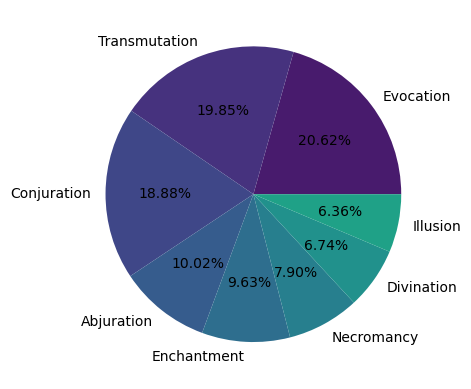

In [34]:
plt.pie(schools, labels=schools.index, colors=colors, autopct='%1.2f%%')

## Evocation

In [35]:
evocation = school_of_magic(spells,'Evocation')
evocation

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything
26,Aura of Vitality,3,Evocation,True,False,NaN,1 action,True,Up to 1 minute,Self (30-foot radius),False,Healing energy radiates from you in an aura wi...,False,NaN,Paladin,Player's Handbook
36,Bigby's Hand,5,Evocation,True,True,An eggshell and a snakeskin glove,1 action,True,Up to 1 minute,120 feet,False,"You create a Large hand of shimmering, translu...",True,When you cast this spell using a spell slot of...,"Artificer,Wizard",Player's Handbook
37,Blade Barrier,6,Evocation,True,True,NaN,1 action,True,Up to 10 minutes,90 feet,False,"You create a vertical wall of whirling, razor-...",False,NaN,Cleric,Player's Handbook
42,Blinding Smite,3,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a melee ...,False,NaN,Paladin,Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,Wind Wall,3,Evocation,True,True,A tiny fan and a feather of exotic origin,1 action,True,Up to 1 minute,120 feet,False,A wall of strong wind rises from the ground at...,False,NaN,"Druid,Ranger",Player's Handbook
510,Witch Bolt,1,Evocation,True,True,A twig from a tree that has been struck by lig...,1 action,True,Up to 1 minute,30 feet,False,"A beam of crackling, blue energy lances out to...",True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook
512,Word of Radiance,0,Evocation,True,False,A holy symbol,1 action,False,Instantaneous,5 feet,False,"You utter a divine word, and burning radiance ...",False,NaN,Cleric,Xanathar's Guide to Everything
514,Wrath of Nature,5,Evocation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,You call out to the spirits of nature to rouse...,False,NaN,"Druid,Ranger",Xanathar's Guide to Everything


In [36]:
evocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 3 to 515
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           107 non-null    object
 1   level          107 non-null    int64 
 2   school         107 non-null    object
 3   V              107 non-null    bool  
 4   S              107 non-null    bool  
 5   M              58 non-null     object
 6   casting_time   107 non-null    object
 7   concentration  107 non-null    bool  
 8   duration       107 non-null    object
 9   range          107 non-null    object
 10  ritual         107 non-null    bool  
 11  description    107 non-null    object
 12  cast_higher    107 non-null    bool  
 13  higher_levels  47 non-null     object
 14  classes        107 non-null    object
 15  book           107 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 10.6+ KB


In [37]:
evocation.describe()

,level
count,107.000000
mean,3.392523
std,2.543052
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,9.000000


## Transmutation

In [38]:
transmutation = school_of_magic(spells,'Transmutation')
transmutation

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
7,Alter Self,2,Transmutation,True,True,NaN,1 action,True,Up to 1 hour,Self,False,You assume a different form. When you cast the...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
10,Animal Shapes,8,Transmutation,True,True,NaN,1 action,True,Up to 24 hours,30 feet,False,Your magic turns others into beasts. Choose an...,False,NaN,Druid,Player's Handbook
12,Animate Objects,5,Transmutation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,Objects come to life at your command. Choose u...,True,If you cast this spell using a spell slot of 6...,"Artificer,Bard,Sorcerer,Wizard",Player's Handbook
21,Ashardalon's Stride,3,Transmutation,True,True,NaN,1 bonus action,True,Up to 1 minute,Self,False,The billowing flames of a dragon blast from yo...,True,When you cast this spell using a spell slot of...,"Artificer,Ranger,Sorcerer,Wizard",Fizban's Treasury of Dragons
27,Awaken,5,Transmutation,True,True,"An agate worth at least 1000 gp, which the spe...",8 hours,False,Instantaneous,Touch,False,After spending the casting time tracing magica...,False,NaN,"Bard,Druid",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,True Polymorph,9,Transmutation,True,True,"A drop of mercury, a dollop of gum arabic, and...",1 action,True,Up to 1 hour,30 feet,False,Choose one creature or nonmagical object that ...,False,NaN,"Bard,Warlock,Wizard",Player's Handbook
501,Water Breathing,3,Transmutation,True,True,A short reed or piece of straw,1 action,False,24 hours,30 feet,True,This spell grants up to ten willing creatures ...,False,NaN,"Artificer,Druid,Ranger,Sorcerer,Wizard",Player's Handbook
502,Water Walk,3,Transmutation,True,True,A piece of cork,1 action,False,1 hour,30 feet,True,This spell grants the ability to move across a...,False,NaN,"Artificer,Cleric,Druid,Ranger,Sorcerer",Player's Handbook
507,Wind Walk,6,Transmutation,True,True,Fire and holy water,1 minute,False,8 hours,30 feet,False,You and up to ten willing creatures you can se...,False,NaN,Druid,Player's Handbook


In [39]:
transmutation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 7 to 517
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           103 non-null    object
 1   level          103 non-null    int64 
 2   school         103 non-null    object
 3   V              103 non-null    bool  
 4   S              103 non-null    bool  
 5   M              55 non-null     object
 6   casting_time   103 non-null    object
 7   concentration  103 non-null    bool  
 8   duration       103 non-null    object
 9   range          103 non-null    object
 10  ritual         103 non-null    bool  
 11  description    103 non-null    object
 12  cast_higher    103 non-null    bool  
 13  higher_levels  22 non-null     object
 14  classes        103 non-null    object
 15  book           103 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 10.2+ KB


In [40]:
transmutation.describe()

,level
count,103.000000
mean,3.495146
std,2.484753
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,9.000000


## Conjuration

In [41]:
conjuration = school_of_magic(spells,'Conjuration')
conjuration

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
2,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
5,Air Bubble,2,Conjuration,False,True,NaN,1 action,False,24 hours,60 feet,False,You create a spectral globe around the head of...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Astral Adventurer's Guide
17,Arcane Gate,6,Conjuration,True,True,NaN,1 action,True,Up to 10 minutes,500 feet,False,You create linked teleportation portals that r...,False,NaN,"Sorcerer,Warlock,Wizard",Player's Handbook
20,Arms of Hadar,1,Conjuration,True,True,NaN,1 action,False,Instantaneous,Self (10-foot radius),False,"You invoke the power of Hadar, the Dark Hunger...",True,When you cast this spell using a spell slot of...,Warlock,Player's Handbook
39,Blade of Disaster,9,Conjuration,True,True,NaN,1 bonus action,True,Up to 1 minute,60 feet,False,You create a blade-shaped planar rift about 3 ...,False,NaN,"Sorcerer,Warlock,Wizard",Tasha's Cauldron of Everything
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Watery Sphere,4,Conjuration,True,True,A droplet of water,1 action,True,Up to 1 minute,90 feet,False,You conjure up a sphere of water with a 5-foot...,False,NaN,"Druid,Sorcerer,Wizard",Xanathar's Guide to Everything
504,Web,2,Conjuration,True,True,A bit of spiderweb,1 action,True,Up to 1 hour,60 feet,False,"You conjure a mass of thick, sticky webbing at...",False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
509,Wish,9,Conjuration,True,False,NaN,1 action,False,Instantaneous,Self,False,Wish is the mightiest spell a mortal creature ...,False,NaN,"Sorcerer,Wizard",Player's Handbook
513,Word of Recall,6,Conjuration,True,False,NaN,1 action,False,Instantaneous,5 feet,False,You and up to five willing creatures within 5 ...,False,NaN,Cleric,Player's Handbook


In [42]:
conjuration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 2 to 516
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           98 non-null     object
 1   level          98 non-null     int64 
 2   school         98 non-null     object
 3   V              98 non-null     bool  
 4   S              98 non-null     bool  
 5   M              51 non-null     object
 6   casting_time   98 non-null     object
 7   concentration  98 non-null     bool  
 8   duration       98 non-null     object
 9   range          98 non-null     object
 10  ritual         98 non-null     bool  
 11  description    98 non-null     object
 12  cast_higher    98 non-null     bool  
 13  higher_levels  39 non-null     object
 14  classes        98 non-null     object
 15  book           98 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 9.7+ KB


In [43]:
conjuration.describe()

,level
count,98.000000
mean,4.020408
std,2.470359
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,9.000000


## Abjuration

In [44]:
abjuration = school_of_magic(spells,'Abjuration')
abjuration

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
1,Absorb Elements,1,Abjuration,False,True,NaN,"1 reaction, which you take when you take acid,...",False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"Artificer,Cleric,Paladin",Player's Handbook
6,Alarm,1,Abjuration,True,True,A tiny bell and a piece of fine silver wire,1 minute,False,8 hours,30 feet,True,You set an alarm against unwanted intrusion. C...,False,NaN,"Artificer,Ranger,Wizard",Player's Handbook
13,Antilife Shell,5,Abjuration,True,True,NaN,1 action,True,Up to 1 hour,Self (10-foot radius),False,A shimmering barrier extends out from you in a...,False,NaN,Druid,Player's Handbook
14,Antimagic Field,8,Abjuration,True,True,A pinch of powdered iron or iron fillings,1 action,True,Up to 1 hour,Self (10-foot radius sphere),False,A 10-foot-radius invisible sphere of antimagic...,False,NaN,"Cleric,Wizard",Player's Handbook
18,Arcane Lock,2,Abjuration,True,True,"Gold dust worth at least 25 gp, which the spel...",1 action,False,Until dispelled,Touch,False,"You touch a closed door, window, gate, chest, ...",False,NaN,"Artificer,Wizard",Player's Handbook
19,Armor of Agathys,1,Abjuration,True,True,A cup of water,1 action,False,1 hour,Self,False,"A protective magical force surrounds you, mani...",True,When you cast this spell using a spell slot of...,Warlock,Player's Handbook
24,Aura of Life,4,Abjuration,True,False,NaN,1 action,True,Up to 10 minutes,Self (30-foot radius),False,Life-preserving energy radiates from you in an...,False,NaN,Paladin,Player's Handbook
25,Aura of Purity,4,Abjuration,True,False,NaN,1 action,True,Up to 10 minutes,Self (30-foot radius),False,Purifying energy radiates from you in an aura ...,False,NaN,Paladin,Player's Handbook
29,Banishing Smite,5,Abjuration,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a weapon...,False,NaN,Paladin,Player's Handbook


In [45]:
abjuration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 1 to 499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           52 non-null     object
 1   level          52 non-null     int64 
 2   school         52 non-null     object
 3   V              52 non-null     bool  
 4   S              52 non-null     bool  
 5   M              32 non-null     object
 6   casting_time   52 non-null     object
 7   concentration  52 non-null     bool  
 8   duration       52 non-null     object
 9   range          52 non-null     object
 10  ritual         52 non-null     bool  
 11  description    52 non-null     object
 12  cast_higher    52 non-null     bool  
 13  higher_levels  12 non-null     object
 14  classes        52 non-null     object
 15  book           52 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 5.1+ KB


In [46]:
abjuration.describe()

,level
count,52.000000
mean,3.769231
std,2.478261
min,0.000000
25%,2.000000
50%,3.000000
75%,5.250000
max,9.000000


## Enchantment

In [47]:
enchantment = school_of_magic(spells,'Enchantment')
enchantment

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
8,Animal Friendship,1,Enchantment,True,True,A morsel of food,1 action,False,24 hours,30 feet,False,This spell lets you convince a beast that you ...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Ranger",Player's Handbook
9,Animal Messenger,2,Enchantment,True,True,A morsel of food,1 action,False,24 hours,30 feet,True,"By means of this spell, you use an animal to d...",True,If you cast this spell using a spell slot of 3...,"Bard,Druid,Ranger",Player's Handbook
15,Antipathy/Sympathy,8,Enchantment,True,True,Either a lump of alum soaked in vinegar for th...,1 hour,False,10 days,60 feet,False,This spell attracts or repels creatures of you...,False,NaN,"Druid,Wizard",Player's Handbook
28,Bane,1,Enchantment,True,True,A drop of blood,1 action,True,Up to 1 minute,30 feet,False,Up to three creatures of your choice that you ...,True,When you cast this spell using a spell slot of...,"Bard,Cleric",Player's Handbook
40,Bless,1,Enchantment,True,True,A sprinkling of holy water,1 action,True,Up to 1 minute,30 feet,False,You bless up to three creatures of your choice...,True,When you cast this spell using a spell slot of...,"Cleric,Paladin",Player's Handbook
52,Calm Emotions,2,Enchantment,True,True,NaN,1 action,True,Up to 1 minute,60 feet,False,You attempt to suppress strong emotions in a g...,False,NaN,Bard,Player's Handbook
54,Catnap,3,Enchantment,False,True,A pinch of sand,1 action,False,10 minutes,30 feet,False,"You make a calming gesture, and up to three wi...",True,When you cast this spell using a spell slot of...,"Artificer,Bard,Sorcerer,Wizard",Xanathar's Guide to Everything
59,Charm Monster,4,Enchantment,True,True,NaN,1 action,False,1 hour,30 feet,False,You attempt to charm a creature you can see wi...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Sorcerer,Warlock,Wizard",Xanathar's Guide to Everything
60,Charm Person,1,Enchantment,True,True,NaN,1 action,False,1 hour,30 feet,False,You attempt to charm a humanoid you can see wi...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Sorcerer,Warlock,Wizard",Player's Handbook
70,Command,1,Enchantment,True,False,NaN,1 action,False,1 round,60 feet,False,You speak a one-word command to a creature you...,True,When you cast this spell using a spell slot of...,"Cleric,Paladin",Player's Handbook


In [48]:
enchantment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 8 to 518
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           50 non-null     object
 1   level          50 non-null     int64 
 2   school         50 non-null     object
 3   V              50 non-null     bool  
 4   S              50 non-null     bool  
 5   M              19 non-null     object
 6   casting_time   50 non-null     object
 7   concentration  50 non-null     bool  
 8   duration       50 non-null     object
 9   range          50 non-null     object
 10  ritual         50 non-null     bool  
 11  description    50 non-null     object
 12  cast_higher    50 non-null     bool  
 13  higher_levels  25 non-null     object
 14  classes        50 non-null     object
 15  book           50 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 4.9+ KB


In [49]:
enchantment.describe()

,level
count,50.000000
mean,3.220000
std,2.565787
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,9.000000


## Necromancy

In [50]:
necromancy = school_of_magic(spells,'Necromancy')
necromancy

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Abi-Dalzim's Horrid Wilting,8,Necromancy,True,True,A bit of sponge,1 action,False,Instantaneous,150 feet,False,You draw the moisture from every creature in a...,False,NaN,"Sorcerer,Wizard",Xanathar's Guide to Everything
11,Animate Dead,3,Necromancy,True,True,"A drop of blood, a piece of flesh, and a pinch...",1 minute,False,Instantaneous,10 feet,False,This spell creates an undead servant. Choose a...,True,When you cast this spell using a spell slot of...,"Cleric,Wizard",Player's Handbook
22,Astral Projection,9,Necromancy,True,True,"For each creature you affect with this spell, ...",1 hour,False,Special,10 feet,False,You and up to eight willing creatures within r...,False,NaN,"Cleric,Warlock,Wizard",Player's Handbook
35,Bestow Curse,3,Necromancy,True,True,NaN,1 action,True,Up to 1 minute,Touch,False,"You touch a creature, and that creature must s...",True,If you cast this spell using a spell slot of 4...,"Bard,Cleric,Wizard",Player's Handbook
41,Blight,4,Necromancy,True,True,NaN,1 action,False,Instantaneous,30 feet,False,Necromantic energy washes over a creature of y...,True,When you cast this spell using a spell slot of...,"Druid,Sorcerer,Warlock,Wizard",Player's Handbook
43,Blindness/Deafness,2,Necromancy,True,False,NaN,1 action,False,1 minute,30 feet,False,You can blind or deafen a foe. Choose one crea...,True,When you cast this spell using a spell slot of...,"Bard,Cleric,Sorcerer,Wizard",Player's Handbook
55,Cause Fear,1,Necromancy,True,False,NaN,1 action,True,Up to 1 minute,60 feet,False,You awaken the sense of mortality in one creat...,True,When you cast this spell using a spell slot of...,"Warlock,Wizard",Xanathar's Guide to Everything
61,Chill Touch,0,Necromancy,True,True,NaN,1 action,False,1 round,120 feet,False,"You create a ghostly, skeletal hand in the spa...",False,NaN,"Sorcerer,Warlock,Wizard",Player's Handbook
63,Circle of Death,6,Necromancy,True,True,The powder of a crushed black pearl worth at l...,1 action,False,Instantaneous,150 feet,False,A sphere of negative energy ripples out in a 6...,True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook
66,Clone,8,Necromancy,True,True,A diamond worth at least 1000 gp and at least ...,1 hour,False,Instantaneous,Touch,False,This spell grows an inert duplicate of a livin...,False,NaN,Wizard,Player's Handbook


In [51]:
necromancy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 511
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           41 non-null     object
 1   level          41 non-null     int64 
 2   school         41 non-null     object
 3   V              41 non-null     bool  
 4   S              41 non-null     bool  
 5   M              21 non-null     object
 6   casting_time   41 non-null     object
 7   concentration  41 non-null     bool  
 8   duration       41 non-null     object
 9   range          41 non-null     object
 10  ritual         41 non-null     bool  
 11  description    41 non-null     object
 12  cast_higher    41 non-null     bool  
 13  higher_levels  17 non-null     object
 14  classes        41 non-null     object
 15  book           41 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 4.0+ KB


In [52]:
necromancy.describe()

,level
count,41.000000
mean,4.121951
std,2.675772
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,9.000000


## Divination

In [53]:
divination = school_of_magic(spells,'Divination')
divination

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
16,Arcane Eye,4,Divination,True,True,A bit of bat fur,1 action,True,Up to 1 hour,30 feet,False,"You create an invisible, magical eye within ra...",False,NaN,"Artificer,Wizard",Player's Handbook
23,Augury,2,Divination,True,True,"Specially marked sticks, bones, or similar tok...",1 minute,False,Instantaneous,Self,True,"By casting gem-inlaid sticks, rolling dragon b...",False,NaN,Cleric,Player's Handbook
33,Beast Bond,1,Divination,True,True,A bit of fur wrapped in a cloth,1 action,True,Up to 10 minutes,Touch,False,You establish a telepathic link with one beast...,False,NaN,"Druid,Ranger",Xanathar's Guide to Everything
34,Beast Sense,2,Divination,False,True,NaN,1 action,True,Up to 1 hour,Touch,True,You touch a willing beast. For the duration of...,False,NaN,"Druid,Ranger",Player's Handbook
48,Borrowed Knowledge,2,Divination,True,True,A book worth at least 25 gp,1 action,False,1 hour,Self,False,You draw on knowledge from spirits of the past...,False,NaN,"Bard,Cleric,Warlock,Wizard",Strixhaven: A Curriculum of Chaos
65,Clairvoyance,3,Divination,True,True,"A focus worth at least 100 gp, either a jewele...",10 minutes,True,Up to 10 minutes,1 mile,False,You create an invisible sensor within range in...,False,NaN,"Bard,Cleric,Sorcerer,Wizard",Player's Handbook
71,Commune,5,Divination,True,True,Incense and a vial of holy or unholy water,1 minute,False,1 minute,Self,True,You contact your deity or a divine proxy and a...,False,NaN,Cleric,Player's Handbook
72,Commune with Nature,5,Divination,True,True,NaN,1 minute,False,Instantaneous,Self,True,You briefly become one with nature and gain kn...,False,NaN,"Druid,Ranger",Player's Handbook
74,Comprehend Languages,1,Divination,True,True,A pinch of soot and salt,1 action,False,1 hour,Self,True,"For the duration, you understand the literal m...",False,NaN,"Bard,Sorcerer,Warlock,Wizard",Player's Handbook
86,Contact Other Plane,5,Divination,True,False,NaN,1 minute,False,1 minute,Self,True,"You mentally contact a demigod, the spirit of ...",False,NaN,"Warlock,Wizard",Player's Handbook


In [54]:
divination.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 16 to 484
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           35 non-null     object
 1   level          35 non-null     int64 
 2   school         35 non-null     object
 3   V              35 non-null     bool  
 4   S              35 non-null     bool  
 5   M              23 non-null     object
 6   casting_time   35 non-null     object
 7   concentration  35 non-null     bool  
 8   duration       35 non-null     object
 9   range          35 non-null     object
 10  ritual         35 non-null     bool  
 11  description    35 non-null     object
 12  cast_higher    35 non-null     bool  
 13  higher_levels  3 non-null      object
 14  classes        35 non-null     object
 15  book           35 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 3.5+ KB


In [55]:
divination.describe()

,level
count,35.000000
mean,2.800000
std,2.055123
min,0.000000
25%,1.000000
50%,2.000000
75%,4.500000
max,9.000000


## Illusion

In [56]:
illusion = school_of_magic(spells,'Illusion')
illusion

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
45,Blur,2,Illusion,True,False,NaN,1 action,True,Up to 1 minute,Self,False,"Your body becomes blurred, shifting and waveri...",False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
69,Color Spray,1,Illusion,True,True,"A pinch of powder or sand that is colored red,...",1 action,False,1 round,Self (15-foot cone),False,"A dazzling array of flashing, colored light sp...",True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Player's Handbook
103,Creation,5,Illusion,True,True,A tiny piece of matter of the same type of the...,1 minute,False,Special,30 feet,False,You pull wisps of shadow material from the Sha...,True,When you cast this spell using a spell slot of...,"Artificer,Sorcerer,Wizard",Player's Handbook
124,Disguise Self,1,Illusion,True,True,NaN,1 action,False,1 hour,Self,False,"You make yourself (including your clothing, ar...",False,NaN,"Artificer,Bard,Sorcerer,Wizard",Player's Handbook
129,Distort Value,1,Illusion,True,False,NaN,1 minute,False,8 hours,Touch,False,You cast this spell on an object no more than ...,True,When you cast this spell using a higher spell ...,"Bard,Sorcerer,Warlock,Wizard",Acquisitions Incorporated
139,Dream,5,Illusion,True,True,"A handful of sand, a dab of ink, and a writing...",1 minute,False,8 hours,Special,False,This spell shapes a creature's dreams. Choose ...,False,NaN,"Bard,Warlock,Wizard",Player's Handbook
168,Fear,3,Illusion,True,True,A white feather or the heart of a hen,1 action,True,Up to 1 minute,Self (30-foot cone),False,You project a phantasmal image of a creature's...,False,NaN,"Bard,Sorcerer,Warlock,Wizard",Player's Handbook
216,Greater Invisibility,4,Illusion,True,True,NaN,1 action,True,Up to 1 minute,Touch,False,You or a creature you touch becomes invisible ...,False,NaN,"Bard,Sorcerer,Wizard",Player's Handbook
228,Hallucinatory Terrain,4,Illusion,True,True,"A stone, a twig, and a bit of green plant",10 minutes,False,24 hours,300 feet,False,You make natural terrain in a 150-foot cube in...,False,NaN,"Bard,Druid,Warlock,Wizard",Player's Handbook
245,Hypnotic Pattern,3,Illusion,False,True,A glowing stick of incense or a crystal vial f...,1 action,True,Up to 1 minute,120 feet,False,You create a twisting pattern of colors that w...,False,NaN,"Bard,Sorcerer,Warlock,Wizard",Player's Handbook


In [57]:
illusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 45 to 505
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           33 non-null     object
 1   level          33 non-null     int64 
 2   school         33 non-null     object
 3   V              33 non-null     bool  
 4   S              33 non-null     bool  
 5   M              18 non-null     object
 6   casting_time   33 non-null     object
 7   concentration  33 non-null     bool  
 8   duration       33 non-null     object
 9   range          33 non-null     object
 10  ritual         33 non-null     bool  
 11  description    33 non-null     object
 12  cast_higher    33 non-null     bool  
 13  higher_levels  7 non-null      object
 14  classes        33 non-null     object
 15  book           33 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 3.3+ KB


In [58]:
illusion.describe()

,level
count,33.000000
mean,3.545455
std,2.333063
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,9.000000


# Spell components

## Verbal components

### Spells that require verbal components

In [59]:
v_spells = spells[spells['V'] == True]
v_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Abi-Dalzim's Horrid Wilting,8,Necromancy,True,True,A bit of sponge,1 action,False,Instantaneous,150 feet,False,You draw the moisture from every creature in a...,False,NaN,"Sorcerer,Wizard",Xanathar's Guide to Everything
2,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"Artificer,Cleric,Paladin",Player's Handbook
6,Alarm,1,Abjuration,True,True,A tiny bell and a piece of fine silver wire,1 minute,False,8 hours,30 feet,True,You set an alarm against unwanted intrusion. C...,False,NaN,"Artificer,Ranger,Wizard",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,Word of Recall,6,Conjuration,True,False,NaN,1 action,False,Instantaneous,5 feet,False,You and up to five willing creatures within 5 ...,False,NaN,Cleric,Player's Handbook
514,Wrath of Nature,5,Evocation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,You call out to the spirits of nature to rouse...,False,NaN,"Druid,Ranger",Xanathar's Guide to Everything
515,Wrathful Smite,1,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit with a melee weapon atta...,False,NaN,Paladin,Player's Handbook
517,Zephyr Strike,1,Transmutation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,"You move like the wind. Until the spell ends, ...",False,NaN,Ranger,Xanathar's Guide to Everything


In [60]:
v_spells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 518
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           486 non-null    object
 1   level          486 non-null    int64 
 2   school         486 non-null    object
 3   V              486 non-null    bool  
 4   S              486 non-null    bool  
 5   M              264 non-null    object
 6   casting_time   486 non-null    object
 7   concentration  486 non-null    bool  
 8   duration       486 non-null    object
 9   range          486 non-null    object
 10  ritual         486 non-null    bool  
 11  description    486 non-null    object
 12  cast_higher    486 non-null    bool  
 13  higher_levels  164 non-null    object
 14  classes        486 non-null    object
 15  book           486 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 47.9+ KB


In [61]:
v_spells.describe()

,level
count,486.000000
mean,3.676955
std,2.459688
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,9.000000


### Spells that don't require verbal components

In [62]:
nonv_spells = spells[spells['V'] == False]
nonv_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
1,Absorb Elements,1,Abjuration,False,True,NaN,"1 reaction, which you take when you take acid,...",False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Xanathar's Guide to Everything
5,Air Bubble,2,Conjuration,False,True,NaN,1 action,False,24 hours,60 feet,False,You create a spectral globe around the head of...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Astral Adventurer's Guide
34,Beast Sense,2,Divination,False,True,NaN,1 action,True,Up to 1 hour,Touch,True,You touch a willing beast. For the duration of...,False,NaN,"Druid,Ranger",Player's Handbook
47,Booming Blade,0,Evocation,False,True,A melee weapon worth at least 1 sp,1 action,False,1 round,Self (5-foot radius),False,You brandish the weapon used in the spell's ca...,False,NaN,"Artificer,Sorcerer,Warlock,Wizard",Tasha's Cauldron of Everything
53,Catapult,1,Transmutation,False,True,NaN,1 action,False,Instantaneous,60 feet,False,Choose one object weighing 1 to 5 pounds withi...,True,When you cast this spell using a spell slot of...,"Artificer,Sorcerer,Wizard",Xanathar's Guide to Everything
54,Catnap,3,Enchantment,False,True,A pinch of sand,1 action,False,10 minutes,30 feet,False,"You make a calming gesture, and up to three wi...",True,When you cast this spell using a spell slot of...,"Artificer,Bard,Sorcerer,Wizard",Xanathar's Guide to Everything
90,Control Flames,0,Transmutation,False,True,NaN,1 action,False,Instantaneous or 1 hour (see description),60 feet,False,You choose a nonmagical flame that you can see...,False,NaN,"Druid,Sorcerer,Wizard",Xanathar's Guide to Everything
95,Counterspell,3,Abjuration,False,True,NaN,"1 reaction, which you take when you see a crea...",False,Instantaneous,60 feet,False,You attempt to interrupt a creature in the pro...,True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook
117,Demiplane,8,Conjuration,False,True,NaN,1 action,False,1 hour,60 feet,False,You create a shadowy door on a flat solid surf...,False,NaN,"Warlock,Wizard",Player's Handbook
150,Encode Thoughts,0,Enchantment,False,True,NaN,1 action,False,8 hours,Self,False,"You pull a memory, an idea, or a message from ...",False,NaN,Wizard,Guildmaster's Guide to Ravnica


In [63]:
nonv_spells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 516
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           33 non-null     object
 1   level          33 non-null     int64 
 2   school         33 non-null     object
 3   V              33 non-null     bool  
 4   S              33 non-null     bool  
 5   M              13 non-null     object
 6   casting_time   33 non-null     object
 7   concentration  33 non-null     bool  
 8   duration       33 non-null     object
 9   range          33 non-null     object
 10  ritual         33 non-null     bool  
 11  description    33 non-null     object
 12  cast_higher    33 non-null     bool  
 13  higher_levels  8 non-null      object
 14  classes        33 non-null     object
 15  book           33 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 3.3+ KB


In [64]:
nonv_spells.describe()

,level
count,33.000000
mean,2.151515
std,2.538715
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,9.000000


### Count

In [65]:
verbal = spells['V'].value_counts()
verbal

True     486
False     33
Name: V, dtype: int64

### Visualization

([<matplotlib.patches.Wedge at 0x22125c057f0>,
 [Text(-1.0781268818382639, 0.2182714517698144, 'Requires verbal component'),
  Text(1.0781268971652973, -0.21827137606367106, 'No verbal component required')],
 [Text(-0.5880692082754166, 0.11905715551080785, '93.64%'),
  Text(0.5880692166356166, -0.11905711421654784, '6.36%')])

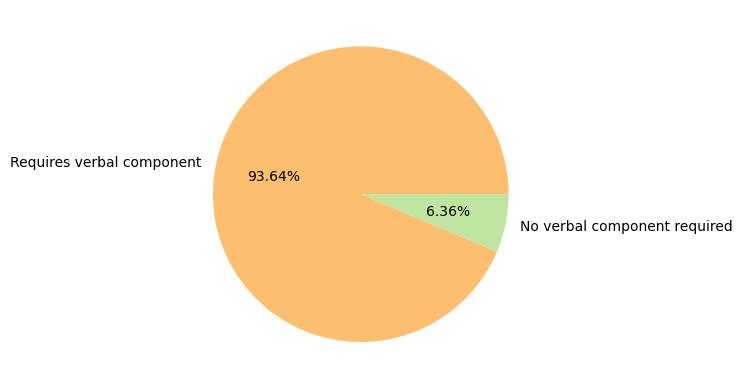

In [66]:
verbal_labels = ["Requires verbal component", "No verbal component required"]

plt.pie(verbal, labels=verbal_labels, colors=two_colors, autopct='%1.2f%%')

## Somatic components

### Spells that require somatic components

In [67]:
s_spells = spells[spells['S'] == True]
s_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Abi-Dalzim's Horrid Wilting,8,Necromancy,True,True,A bit of sponge,1 action,False,Instantaneous,150 feet,False,You draw the moisture from every creature in a...,False,NaN,"Sorcerer,Wizard",Xanathar's Guide to Everything
1,Absorb Elements,1,Abjuration,False,True,NaN,"1 reaction, which you take when you take acid,...",False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Xanathar's Guide to Everything
2,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"Artificer,Cleric,Paladin",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Witch Bolt,1,Evocation,True,True,A twig from a tree that has been struck by lig...,1 action,True,Up to 1 minute,30 feet,False,"A beam of crackling, blue energy lances out to...",True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook
511,Wither and Bloom,2,Necromancy,True,True,A withered vine twisted into a loop,1 action,False,Instantaneous,60 feet,False,You invoke both death and life upon a 10-foot-...,True,When you cast this spell using a spell slot of...,"Druid,Sorcerer,Wizard",Strixhaven: A Curriculum of Chaos
514,Wrath of Nature,5,Evocation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,You call out to the spirits of nature to rouse...,False,NaN,"Druid,Ranger",Xanathar's Guide to Everything
516,Wristpocket,2,Conjuration,False,True,NaN,1 action,True,Up to 1 hour,Self,True,"You flick your wrist, causing one object in yo...",False,NaN,Wizard,Explorer's Guide to Wildemount


In [68]:
s_spells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445 entries, 0 to 518
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           445 non-null    object
 1   level          445 non-null    int64 
 2   school         445 non-null    object
 3   V              445 non-null    bool  
 4   S              445 non-null    bool  
 5   M              266 non-null    object
 6   casting_time   445 non-null    object
 7   concentration  445 non-null    bool  
 8   duration       445 non-null    object
 9   range          445 non-null    object
 10  ritual         445 non-null    bool  
 11  description    445 non-null    object
 12  cast_higher    445 non-null    bool  
 13  higher_levels  151 non-null    object
 14  classes        445 non-null    object
 15  book           445 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 43.9+ KB


In [69]:
s_spells.describe()

,level
count,445.000000
mean,3.613483
std,2.474882
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,9.000000


### Spells that don't require somatic components

In [70]:
nons_spells = spells[spells['S'] == False]
nons_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
24,Aura of Life,4,Abjuration,True,False,NaN,1 action,True,Up to 10 minutes,Self (30-foot radius),False,Life-preserving energy radiates from you in an...,False,NaN,Paladin,Player's Handbook
25,Aura of Purity,4,Abjuration,True,False,NaN,1 action,True,Up to 10 minutes,Self (30-foot radius),False,Purifying energy radiates from you in an aura ...,False,NaN,Paladin,Player's Handbook
26,Aura of Vitality,3,Evocation,True,False,NaN,1 action,True,Up to 1 minute,Self (30-foot radius),False,Healing energy radiates from you in an aura wi...,False,NaN,Paladin,Player's Handbook
29,Banishing Smite,5,Abjuration,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a weapon...,False,NaN,Paladin,Player's Handbook
42,Blinding Smite,3,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a melee ...,False,NaN,Paladin,Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Wish,9,Conjuration,True,False,NaN,1 action,False,Instantaneous,Self,False,Wish is the mightiest spell a mortal creature ...,False,NaN,"Sorcerer,Wizard",Player's Handbook
512,Word of Radiance,0,Evocation,True,False,A holy symbol,1 action,False,Instantaneous,5 feet,False,"You utter a divine word, and burning radiance ...",False,NaN,Cleric,Xanathar's Guide to Everything
513,Word of Recall,6,Conjuration,True,False,NaN,1 action,False,Instantaneous,5 feet,False,You and up to five willing creatures within 5 ...,False,NaN,Cleric,Player's Handbook
515,Wrathful Smite,1,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit with a melee weapon atta...,False,NaN,Paladin,Player's Handbook


In [71]:
nons_spells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 24 to 517
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           74 non-null     object
 1   level          74 non-null     int64 
 2   school         74 non-null     object
 3   V              74 non-null     bool  
 4   S              74 non-null     bool  
 5   M              11 non-null     object
 6   casting_time   74 non-null     object
 7   concentration  74 non-null     bool  
 8   duration       74 non-null     object
 9   range          74 non-null     object
 10  ritual         74 non-null     bool  
 11  description    74 non-null     object
 12  cast_higher    74 non-null     bool  
 13  higher_levels  21 non-null     object
 14  classes        74 non-null     object
 15  book           74 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 7.3+ KB


In [72]:
nons_spells.describe()

,level
count,74.000000
mean,3.378378
std,2.589244
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,9.000000


### Count

In [73]:
somatic = spells['S'].value_counts()
somatic

True     445
False     74
Name: S, dtype: int64

### Visualization

([<matplotlib.patches.Wedge at 0x22125c4e760>,
 [Text(-0.991478111566703, 0.4764148972105353, 'Requires somatic component'),
  Text(0.9914781338692925, -0.4764148507960948, 'No somatic component required')],
 [Text(-0.540806242672747, 0.2598626712057465, '85.74%'),
  Text(0.5408062548377959, -0.25986264588877894, '14.26%')])

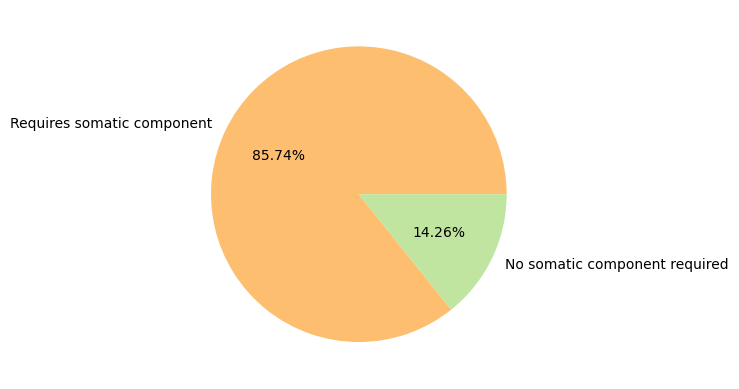

In [74]:
somatic_labels = ["Requires somatic component","No somatic component required"]

plt.pie(somatic, labels=somatic_labels, colors=two_colors, autopct='%1.2f%%')

## Material components

### Spells that require material components

In [75]:
material_components = spells[spells["M"].notna()]
material_components

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Abi-Dalzim's Horrid Wilting,8,Necromancy,True,True,A bit of sponge,1 action,False,Instantaneous,150 feet,False,You draw the moisture from every creature in a...,False,NaN,"Sorcerer,Wizard",Xanathar's Guide to Everything
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"Artificer,Cleric,Paladin",Player's Handbook
6,Alarm,1,Abjuration,True,True,A tiny bell and a piece of fine silver wire,1 minute,False,8 hours,30 feet,True,You set an alarm against unwanted intrusion. C...,False,NaN,"Artificer,Ranger,Wizard",Player's Handbook
8,Animal Friendship,1,Enchantment,True,True,A morsel of food,1 action,False,24 hours,30 feet,False,This spell lets you convince a beast that you ...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Ranger",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Wind Walk,6,Transmutation,True,True,Fire and holy water,1 minute,False,8 hours,30 feet,False,You and up to ten willing creatures you can se...,False,NaN,Druid,Player's Handbook
508,Wind Wall,3,Evocation,True,True,A tiny fan and a feather of exotic origin,1 action,True,Up to 1 minute,120 feet,False,A wall of strong wind rises from the ground at...,False,NaN,"Druid,Ranger",Player's Handbook
510,Witch Bolt,1,Evocation,True,True,A twig from a tree that has been struck by lig...,1 action,True,Up to 1 minute,30 feet,False,"A beam of crackling, blue energy lances out to...",True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook
511,Wither and Bloom,2,Necromancy,True,True,A withered vine twisted into a loop,1 action,False,Instantaneous,60 feet,False,You invoke both death and life upon a 10-foot-...,True,When you cast this spell using a spell slot of...,"Druid,Sorcerer,Wizard",Strixhaven: A Curriculum of Chaos


### Spells that don't require material components

In [76]:
non_mc = spells[spells["M"].isna()]
non_mc

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
1,Absorb Elements,1,Abjuration,False,True,NaN,"1 reaction, which you take when you take acid,...",False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Xanathar's Guide to Everything
2,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
5,Air Bubble,2,Conjuration,False,True,NaN,1 action,False,24 hours,60 feet,False,You create a spectral globe around the head of...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Astral Adventurer's Guide
7,Alter Self,2,Transmutation,True,True,NaN,1 action,True,Up to 1 hour,Self,False,You assume a different form. When you cast the...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
10,Animal Shapes,8,Transmutation,True,True,NaN,1 action,True,Up to 24 hours,30 feet,False,Your magic turns others into beasts. Choose an...,False,NaN,Druid,Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Wrath of Nature,5,Evocation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,You call out to the spirits of nature to rouse...,False,NaN,"Druid,Ranger",Xanathar's Guide to Everything
515,Wrathful Smite,1,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit with a melee weapon atta...,False,NaN,Paladin,Player's Handbook
516,Wristpocket,2,Conjuration,False,True,NaN,1 action,True,Up to 1 hour,Self,True,"You flick your wrist, causing one object in yo...",False,NaN,Wizard,Explorer's Guide to Wildemount
517,Zephyr Strike,1,Transmutation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,"You move like the wind. Until the spell ends, ...",False,NaN,Ranger,Xanathar's Guide to Everything


In [77]:
material_components.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 512
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           277 non-null    object
 1   level          277 non-null    int64 
 2   school         277 non-null    object
 3   V              277 non-null    bool  
 4   S              277 non-null    bool  
 5   M              277 non-null    object
 6   casting_time   277 non-null    object
 7   concentration  277 non-null    bool  
 8   duration       277 non-null    object
 9   range          277 non-null    object
 10  ritual         277 non-null    bool  
 11  description    277 non-null    object
 12  cast_higher    277 non-null    bool  
 13  higher_levels  89 non-null     object
 14  classes        277 non-null    object
 15  book           277 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 27.3+ KB


### Count

In [78]:
materials_labels = ["Requires material components", "No material components required"]

data = {materials_labels[0]:277,materials_labels[1]:242}
materials_ser = pd.Series(data=data, index=materials_labels)
materials_ser

Requires material components       277
No material components required    242
dtype: int64

### Visualization

([<matplotlib.patches.Wedge at 0x22125c991c0>,
 [Text(-0.11630567903026233, 1.0938340774657322, 'Requires material components'),
  Text(0.11630578144239956, -1.093834066576404, 'No material components required')],
 [Text(-0.06343946128923399, 0.596636769526763, '53.37%'),
  Text(0.06343951715039975, -0.5966367635871294, '46.63%')])

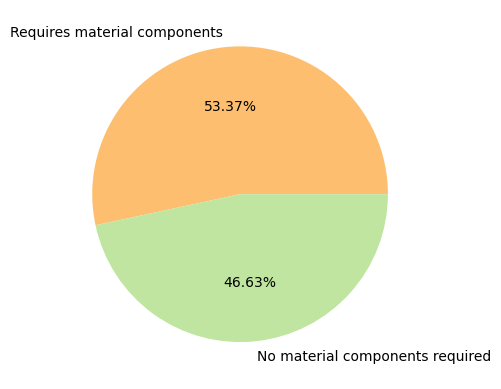

In [79]:
plt.pie(materials_ser, labels=materials_ser.index, colors=two_colors,
        autopct='%1.2f%%')

## Material search function

In [80]:
find_materials(spells,"Fire Bolt")

NameError: Spell has no material components, or name was typed incorrectly.

In [81]:
find_materials(spells,"Wither and Bloom")

Spell: Wither and Bloom 
 Materials: A withered vine twisted into a loop 



# Casting time

In [82]:
spells['casting_time'].value_counts()

1 action                                                                                                                                             390
1 bonus action                                                                                                                                        42
1 minute                                                                                                                                              41
10 minutes                                                                                                                                            19
1 hour                                                                                                                                                14
1 reaction, which you take in response to being damaged by a creature within 60 feet of you that you can see                                           1
1 reaction, which you take when a humanoid you can see within 60 feet of you dies 

## Filtering all the reaction spells into a new DataFrame and count

In [83]:
ct_filter = []
for commas in spells['casting_time']:
    if "," in commas:
        filtered = "1 reaction"
        ct_filter.append(filtered)
    else:
        ct_filter.append(commas)
        
ct_spells = spells
ct_spells['casting_time'] = ct_filter

casting_times = ct_spells['casting_time'].value_counts()
casting_times

1 action               390
1 bonus action          42
1 minute                41
10 minutes              19
1 hour                  14
1 reaction               9
8 hours                  1
24 hours                 1
1 action or 8 hours      1
12 hours                 1
Name: casting_time, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x22125e6f8b0>,
 [Text(-0.7813406925740733, 0.7742781942737814, '1 action'),
  Text(0.28630870302859673, -1.0620863084373524, '1 bonus action'),
  Text(0.762366231385475, -0.7929676722560061, '1 minute'),
  Text(0.9943438155657279, -0.47040448174543353, '10 minutes'),
  Text(1.0679133532458953, -0.2637443268756837, '1 hour'),
  Text(1.094181100474022, -0.1129943333333939, '1 reaction'),
  Text(1.099012685857489, -0.04659523928802502, '8 hours'),
  Text(1.0994962329924103, -0.03328713919067796, '24 hours'),
  Text(1.0998186363728486, -0.019974160482178684, '1 action or 8 hours'),
  Text(1.0999798487468995, -0.006658254331896382, '12 hours')],
 [Text(-0.42618583231313084, 0.4223335605129716, '75.14%'),
  Text(0.15616838347014364, -0.5793198046021922, '8.09%'),
  Text(0.41583612621025906, -0.4325278212305487, '7.90%'),
  Text(0.5423693539449425, -0.25658426277023644, '3.66%'),
  Text(0.5824981926795793, -0.14386054193219108, '2.70%'),
  Text(0.59682605480401

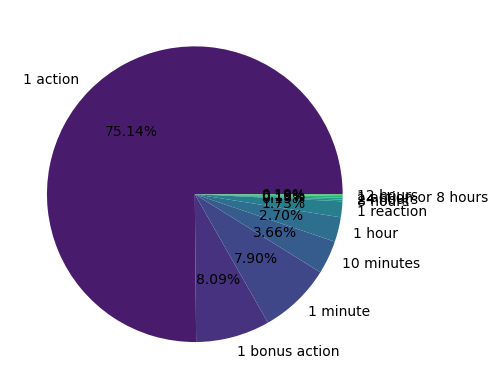

In [84]:
plt.pie(casting_times, labels=casting_times.index, colors=colors, autopct='%1.2f%%')

### Percentage of reaction spells

In [85]:
(9/519)*100

1.7341040462427744

### Percentage for the other spells

In [86]:
(1/519)*100

0.1926782273603083

## Reaction spells

In [87]:
reaction_spells = ct_spells[ct_spells['casting_time'] == '1 reaction']
reaction_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
1,Absorb Elements,1,Abjuration,False,True,NaN,1 reaction,False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Xanathar's Guide to Everything
95,Counterspell,3,Abjuration,False,True,NaN,1 reaction,False,Instantaneous,60 feet,False,You attempt to interrupt a creature in the pro...,True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook
169,Feather Fall,1,Transmutation,True,False,A small feather or piece of down,1 reaction,False,1 minute,60 feet,False,Choose up to five falling creatures within ran...,False,NaN,"Artificer,Bard,Sorcerer,Wizard",Player's Handbook
207,Gift of Gab,2,Enchantment,True,True,"2 gp, which are consumed as tax for using the ...",1 reaction,False,Instantaneous,Self,False,"When you cast this spell, you skillfully resha...",False,NaN,"Bard,Wizard",Acquisitions Incorporated
235,Hellish Rebuke,1,Evocation,True,True,NaN,1 reaction,False,Instantaneous,60 feet,False,"You point your finger, and the creature that d...",True,When you cast this spell using a spell slot of...,Warlock,Player's Handbook
401,Shield,1,Abjuration,True,True,NaN,1 reaction,False,1 round,Self,False,An invisible barrier of magical force appears ...,False,NaN,"Sorcerer,Wizard",Player's Handbook
408,Silvery Barbs,1,Enchantment,True,False,NaN,1 reaction,False,Instantaneous,60 feet,False,You magically distract the triggering creature...,False,NaN,"Bard,Sorcerer,Wizard",Strixhaven: A Curriculum of Chaos
417,Soul Cage,6,Necromancy,True,True,A tiny silver cage worth 100 gp,1 reaction,False,8 hours,60 feet,False,This spell snatches the soul of a humanoid as ...,False,NaN,"Warlock,Wizard",Xanathar's Guide to Everything
462,Temporal Shunt,5,Transmutation,True,True,NaN,1 reaction,False,1 round,120 feet,False,"You target the triggering creature, which must...",True,When you cast this spell using a spell slot of...,Wizard,Explorer's Guide to Wildemount


## 8 hours spell

In [88]:
ct_spells[ct_spells['casting_time'] == '8 hours']

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
27,Awaken,5,Transmutation,True,True,"An agate worth at least 1000 gp, which the spe...",8 hours,False,Instantaneous,Touch,False,After spending the casting time tracing magica...,False,NaN,"Bard,Druid",Player's Handbook


## 24 hours spell

In [89]:
ct_spells[ct_spells['casting_time'] == '24 hours']

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
227,Hallow,5,Evocation,True,True,"Herbs, oils, and incense worth at least 1000 g...",24 hours,False,Until dispelled,Touch,False,You touch a point and infuse an area around it...,False,NaN,Cleric,Player's Handbook


## 1 action or 8 hours spell

In [90]:
ct_spells[ct_spells['casting_time'] == '1 action or 8 hours']

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
345,Plant Growth,3,Transmutation,True,True,NaN,1 action or 8 hours,False,Instantaneous,150 feet,False,This spell channels vitality into plants withi...,False,NaN,"Bard,Druid,Ranger",Player's Handbook


## 12 hours spell

In [91]:
ct_spells[ct_spells['casting_time'] == '12 hours']

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
409,Simulacrum,7,Illusion,True,True,Snow or ice in quantities sufficient to make a...,12 hours,False,Until dispelled,Touch,False,You shape an illusory duplicate of one beast o...,False,NaN,Wizard,Player's Handbook


## 1 hour spells

In [92]:
hour_spells = ct_spells[ct_spells['casting_time'] == '1 hour']
hour_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
15,Antipathy/Sympathy,8,Enchantment,True,True,Either a lump of alum soaked in vinegar for th...,1 hour,False,10 days,60 feet,False,This spell attracts or repels creatures of you...,False,NaN,"Druid,Wizard",Player's Handbook
22,Astral Projection,9,Necromancy,True,True,"For each creature you affect with this spell, ...",1 hour,False,Special,10 feet,False,You and up to eight willing creatures within r...,False,NaN,"Cleric,Warlock,Wizard",Player's Handbook
56,Ceremony,1,Abjuration,True,True,"25 gp worth of powdered silver, which the spel...",1 hour,False,Instantaneous,Touch,True,You perform a special religious ceremony that ...,False,NaN,"Cleric,Paladin",Xanathar's Guide to Everything
66,Clone,8,Necromancy,True,True,A diamond worth at least 1000 gp and at least ...,1 hour,False,Instantaneous,Touch,False,This spell grows an inert duplicate of a livin...,False,NaN,Wizard,Player's Handbook
98,Create Homunculus,6,Transmutation,True,True,"Clay, ash, and mandrake root, all of which the...",1 hour,False,Instantaneous,Touch,False,"While speaking an intricate incantation, you c...",False,NaN,Wizard,Xanathar's Guide to Everything
99,Create Magen,7,Transmutation,True,True,A vial of quicksilver worth 500 gp and a life-...,1 hour,False,Instantaneous,Touch,False,"While casting the spell, you place a vial of q...",False,NaN,Wizard,Icewind Dale: Rime of the Frostmaiden
172,Find Familiar,1,Conjuration,True,True,"10 gp worth af charcoal, incense, and herbs th...",1 hour,False,Instantaneous,10 feet,True,"You gain the service of a familiar, a spirit t...",False,NaN,Wizard,Player's Handbook
210,Glyph of Warding,3,Abjuration,True,True,Incense and powdered diamond worth at least 20...,1 hour,False,Until dispelled or triggered,Touch,False,"When you cast this spell, you inscribe a glyph...",True,When you cast this spell using a spell slot of...,"Artificer,Bard,Cleric,Wizard",Player's Handbook
343,Planar Binding,5,Abjuration,True,True,"A jewel worth at least 1000 gp, which the spel...",1 hour,False,24 hours,60 feet,False,"With this spell, you attempt to bind a celesti...",True,When you cast this spell using a spell slot of...,"Bard,Cleric,Druid,Wizard",Player's Handbook
368,Raise Dead,5,Necromancy,True,True,"A diamond worth at least 500 gp, which the spe...",1 hour,False,Instantaneous,Touch,False,"You return a dead creature you touch to life, ...",False,NaN,"Bard,Cleric,Paladin",Player's Handbook


## 10 minute spells

In [93]:
ten_minute_spells = ct_spells[ct_spells['casting_time'] == '10 minutes']
ten_minute_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
65,Clairvoyance,3,Divination,True,True,"A focus worth at least 100 gp, either a jewele...",10 minutes,True,Up to 10 minutes,1 mile,False,You create an invisible sensor within range in...,False,NaN,"Bard,Cleric,Sorcerer,Wizard",Player's Handbook
88,Contigency,6,Evocation,True,True,A statuette of yourself carved from ivory and ...,10 minutes,False,10 days,Self,False,Choose a spell of 5th level or lower that you ...,False,NaN,Wizard,Player's Handbook
92,Control Weather,8,Transmutation,True,True,Burning incense and bits of earth and wood mix...,10 minutes,True,Up to 8 hours,Self (5-mile radius),False,You take control of the weather within 5 miles...,False,NaN,"Cleric,Druid,Wizard",Player's Handbook
140,Dream of the Blue Veil,7,Conjuration,True,True,A magic item or a willing creature from the de...,10 minutes,False,6 hours,20 feet,False,You and up to eight willing creatures within r...,False,NaN,"Bard,Sorcerer,Warlock,Wizard",Tasha's Cauldron of Everything
141,Druid Grove,6,Abjuration,True,True,"Mistletoe, which the spell consumes, that was ...",10 minutes,False,24 hours,Touch,False,You invoke the spirits of nature to protect an...,False,NaN,Druid,Xanathar's Guide to Everything
163,Fabricate,4,Transmutation,True,True,NaN,10 minutes,False,Instantaneous,120 feet,False,You convert raw materials into products of the...,False,NaN,"Artificer,Wizard",Player's Handbook
173,Find Greater Steed,4,Conjuration,True,True,NaN,10 minutes,False,Instantaneous,30 feet,False,You summon a spirit that assumes the form of a...,False,NaN,Paladin,Xanathar's Guide to Everything
174,Find Steed,2,Conjuration,True,True,NaN,10 minutes,False,Instantaneous,30 feet,False,You summon a spirit that assumes the form of a...,False,NaN,Paladin,Player's Handbook
191,Forbiddance,6,Abjuration,True,True,"A sprinkling of holy water, rare incense, and ...",10 minutes,False,1 day,Touch,True,You create a ward against magical travel that ...,False,NaN,Cleric,Player's Handbook
200,Galder's Tower,3,Conjuration,True,True,"A fragment of stone, wood, or other building m...",10 minutes,False,24 hours,30 feet,False,"You conjure a two-story tower made of stone, w...",True,When you cast this spell using a spell slot of...,Wizard,Lost Laboratory of Kwalish


## 1 minute spells

In [94]:
minute_spells = ct_spells[ct_spells['casting_time'] == '1 minute']
minute_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
6,Alarm,1,Abjuration,True,True,A tiny bell and a piece of fine silver wire,1 minute,False,8 hours,30 feet,True,You set an alarm against unwanted intrusion. C...,False,NaN,"Artificer,Ranger,Wizard",Player's Handbook
11,Animate Dead,3,Necromancy,True,True,"A drop of blood, a piece of flesh, and a pinch...",1 minute,False,Instantaneous,10 feet,False,This spell creates an undead servant. Choose a...,True,When you cast this spell using a spell slot of...,"Cleric,Wizard",Player's Handbook
23,Augury,2,Divination,True,True,"Specially marked sticks, bones, or similar tok...",1 minute,False,Instantaneous,Self,True,"By casting gem-inlaid sticks, rolling dragon b...",False,NaN,Cleric,Player's Handbook
71,Commune,5,Divination,True,True,Incense and a vial of holy or unholy water,1 minute,False,1 minute,Self,True,You contact your deity or a divine proxy and a...,False,NaN,Cleric,Player's Handbook
72,Commune with Nature,5,Divination,True,True,NaN,1 minute,False,Instantaneous,Self,True,You briefly become one with nature and gain kn...,False,NaN,"Druid,Ranger",Player's Handbook
80,Conjure Celestial,7,Conjuration,True,True,NaN,1 minute,True,Up to 1 hour,90 feet,False,You summon a celestial of challenge rating 4 o...,True,When you cast this spell using a 9th-level spe...,Cleric,Player's Handbook
81,Conjure Elemental,5,Conjuration,True,True,"Burning incense for air, soft clay for earth, ...",1 minute,True,Up to 1 hour,90 feet,False,You call forth an elemental servant. Choose an...,True,When you cast this spell using a spell slot of...,"Druid,Wizard",Player's Handbook
82,Conjure Fey,6,Conjuration,True,True,NaN,1 minute,True,Up to 1 hour,90 feet,False,You summon a fey creature of challenge rating ...,True,When you cast this spell using a spell slot of...,"Druid,Warlock",Player's Handbook
83,Conjure Minor Elementals,4,Conjuration,True,True,NaN,1 minute,True,Up to 1 hour,90 feet,False,You summon elementals that appear in unoccupie...,True,When you cast this spell using certain higher-...,"Druid,Wizard",Player's Handbook
86,Contact Other Plane,5,Divination,True,False,NaN,1 minute,False,1 minute,Self,True,"You mentally contact a demigod, the spirit of ...",False,NaN,"Warlock,Wizard",Player's Handbook


## 1 bonus action spells

In [95]:
ba_spells = ct_spells[ct_spells['casting_time'] == '1 bonus action']
ba_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
21,Ashardalon's Stride,3,Transmutation,True,True,NaN,1 bonus action,True,Up to 1 minute,Self,False,The billowing flames of a dragon blast from yo...,True,When you cast this spell using a spell slot of...,"Artificer,Ranger,Sorcerer,Wizard",Fizban's Treasury of Dragons
29,Banishing Smite,5,Abjuration,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a weapon...,False,NaN,Paladin,Player's Handbook
39,Blade of Disaster,9,Conjuration,True,True,NaN,1 bonus action,True,Up to 1 minute,60 feet,False,You create a blade-shaped planar rift about 3 ...,False,NaN,"Sorcerer,Warlock,Wizard",Tasha's Cauldron of Everything
42,Blinding Smite,3,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a melee ...,False,NaN,Paladin,Player's Handbook
49,Branding Smite,2,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a weapon...,True,When you cast this spell using a spell slot of...,Paladin,Player's Handbook
73,Compelled Duel,1,Enchantment,True,False,NaN,1 bonus action,True,Up to 1 minute,30 feet,False,You attempt to compel a creature into a duel. ...,False,NaN,Paladin,Player's Handbook
131,Divine Favor,1,Evocation,True,True,NaN,1 bonus action,True,Up to 1 minute,Self,False,Your prayer empowers you with divine radiance...,False,NaN,Paladin,Player's Handbook
132,Divine Word,7,Evocation,True,False,NaN,1 bonus action,False,Instantaneous,30 feet,False,"You utter a divine word, imbued with the power...",False,NaN,Cleric,Player's Handbook
136,Draconic Transformation,7,Transmutation,True,True,"A statuette of a dragon, worth at least 500 gp",1 bonus action,True,Up to 1 minute,Self,False,"With a roar, you draw on the magic of dragons ...",False,NaN,"Druid,Sorcerer,Wizard",Fizban's Treasury of Dragons
137,Dragon's Breath,2,Transmutation,True,True,A hot pepper,1 bonus action,True,Up to 1 minute,Touch,False,You touch one willing creature and imbue it wi...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything


## 1 action spells

In [96]:
action_spells = ct_spells[ct_spells['casting_time'] == '1 action']
action_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Abi-Dalzim's Horrid Wilting,8,Necromancy,True,True,A bit of sponge,1 action,False,Instantaneous,150 feet,False,You draw the moisture from every creature in a...,False,NaN,"Sorcerer,Wizard",Xanathar's Guide to Everything
2,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"Artificer,Sorcerer,Wizard",Player's Handbook
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"Artificer,Cleric,Paladin",Player's Handbook
5,Air Bubble,2,Conjuration,False,True,NaN,1 action,False,24 hours,60 feet,False,You create a spectral globe around the head of...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Astral Adventurer's Guide
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Word of Radiance,0,Evocation,True,False,A holy symbol,1 action,False,Instantaneous,5 feet,False,"You utter a divine word, and burning radiance ...",False,NaN,Cleric,Xanathar's Guide to Everything
513,Word of Recall,6,Conjuration,True,False,NaN,1 action,False,Instantaneous,5 feet,False,You and up to five willing creatures within 5 ...,False,NaN,Cleric,Player's Handbook
514,Wrath of Nature,5,Evocation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,You call out to the spirits of nature to rouse...,False,NaN,"Druid,Ranger",Xanathar's Guide to Everything
516,Wristpocket,2,Conjuration,False,True,NaN,1 action,True,Up to 1 hour,Self,True,"You flick your wrist, causing one object in yo...",False,NaN,Wizard,Explorer's Guide to Wildemount


# Concentration spells

## Count

In [97]:
concentration = spells['concentration'].value_counts()
concentration

False    287
True     232
Name: concentration, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x22127132b50>,
 [Text(-0.18226373651817834, 1.0847948793898468, 'Not concentration'),
  Text(0.18226373651817843, -1.0847948793898468, 'Concentration')],
 [Text(-0.09941658355536999, 0.5917062978490073, '55.30%'),
  Text(0.09941658355537004, -0.5917062978490073, '44.70%')])

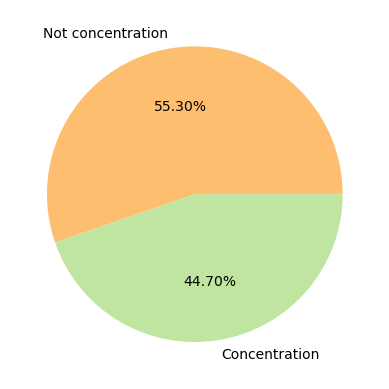

In [98]:
c_labels = ["Not concentration", "Concentration"]

plt.pie(concentration, labels=c_labels, colors=two_colors, autopct='%1.2f%%')

# Duration

## Count

In [99]:
durations = spells['duration'].value_counts()
durations

Instantaneous                                146
Up to 1 minute                               122
Up to 1 hour                                  58
Up to 10 minutes                              47
1 hour                                        33
8 hours                                       21
1 minute                                      16
24 hours                                      16
1 round                                       15
Until dispelled                               11
10 minutes                                     9
10 days                                        5
Instantaneous or 1 hour (see description)      3
Up to 8 hours                                  3
Special                                        2
Up to 1 day                                    2
Until dispelled or triggered                   2
7 days                                         1
Up to 24 hours                                 1
6 hours                                        1
1 day               

## Visualization

([<matplotlib.patches.Wedge at 0x22127179f40>,
 [Text(0.6976717840462864, 0.8504434618160528, 'Instantaneous'),
  Text(-0.8851987126521861, 0.653010902756541, 'Up to 1 minute'),
  Text(-0.9885761507847827, -0.48240770526551796, 'Up to 1 hour'),
  Text(-0.5091535410292553, -0.9750705982939751, 'Up to 10 minutes'),
  Text(0.0033292055740885298, -1.099994961984029, '1 hour'),
  Text(0.3563406212217053, -1.0406831226013658, '8 hours'),
  Text(0.5785757494280918, -0.9355480223771103, '1 minute'),
  Text(0.7478412718177985, -0.8066805019125837, '24 hours'),
  Text(0.8851987279370089, -0.6530108820369699, '1 round'),
  Text(0.9766071202581579, -0.5062000915261357, 'Until dispelled'),
  Text(1.0305917902057893, -0.3845524177019648, '10 minutes'),
  Text(1.059442993439861, -0.2959401014583641, '10 days'),
  Text(1.0725264271004395, -0.2443093595652157, 'Instantaneous or 1 hour (see description)'),
  Text(1.0806902551479014, -0.20520373395326913, 'Up to 8 hours'),
  Text(1.0864050380595067, -0.1

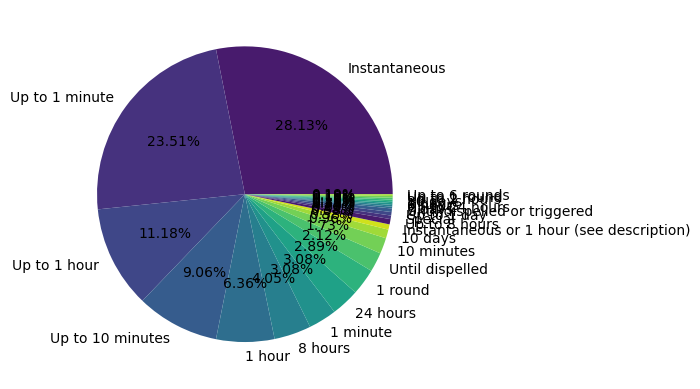

In [100]:
plt.pie(durations, labels=durations.index, colors=colors, autopct='%1.2f%%')

### 8 hour spells percentage

In [101]:
(21/519)*100

4.046242774566474

### 1 minute and 24 hour spells percentages

In [102]:
(16/519)*100

3.0828516377649327

### 1 round spells percentage

In [103]:
(15/519)*100

2.8901734104046244

### Until dispelled spells percentage

In [104]:
(11/519)*100

2.119460500963391

### 10 minute spells percentage

In [105]:
(9/519)*100

1.7341040462427744

### 10 day spells percentage

In [106]:
(5/519)*100

0.9633911368015413

### Instantaneous or 1 hour and Up to 8 hour spells percentages

In [107]:
(3/519)*100

0.5780346820809248

### Special, Up to 1 day and Until dispelled or triggered spells percentages

In [108]:
(2/519)*100

0.3853564547206166

### 7 days, Up to 24 hours, 6 hours, 1 day, 30 days, Up to 2 hours, Up to 1 round and Up to 6 rounds spells percentages

In [109]:
(1/519)*100

0.1926782273603083

# Range

## Count

In [110]:
rg = spells['range'].value_counts()
rg

60 feet                             97
Touch                               88
Self                                85
30 feet                             68
120 feet                            51
90 feet                             35
150 feet                            18
10 feet                             14
300 feet                             9
Self (30-foot radius)                6
Sight                                4
5 feet                               4
500 feet                             3
Self (60-foot cone)                  3
Self (10-foot radius)                3
Self (30-foot cone)                  3
1 mile                               3
Self (15-foot cone)                  3
Self (5-foot radius)                 3
Self (100-foot line)                 2
Unlimited                            2
Self (15-foot radius)                2
Self (60-foot line)                  2
100 feet                             2
Self (5-mile radius)                 1
Self (10-foot-radius hemi

## Visualization

([<matplotlib.patches.Wedge at 0x2212722c7f0>,
 [Text(0.9157709661728521, 0.6093960432385831, '60 feet'),
  Text(-0.14935305658522702, 1.0898135916241136, 'Touch'),
  Text(-1.0184827775440157, 0.4155632705692686, 'Self'),
  Text(-0.9441961124985274, -0.5643524618026117, '30 feet'),
  Text(-0.3373847006267587, -1.0469821219977888, '120 feet'),
  Text(0.22805147746083382, -1.0761006103650026, '90 feet'),
  Text(0.5557562655973353, -0.9492812930050314, '150 feet'),
  Text(0.7280920904143314, -0.8245495181467813, '10 feet'),
  Text(0.8354727801236481, -0.7155314344404881, '300 feet'),
  Text(0.8969104656347615, -0.6368293465559165, 'Self (30-foot radius)'),
  Text(0.933792585876691, -0.5814046839867416, 'Sight'),
  Text(0.9608416285145923, -0.5355215821173097, '5 feet'),
  Text(0.9826636245273562, -0.49434016732484864, '500 feet'),
  Text(0.9999655836860594, -0.45833266460443184, 'Self (60-foot cone)'),
  Text(1.0159486642348767, -0.4217206559315896, 'Self (10-foot radius)'),
  Text(1.0305

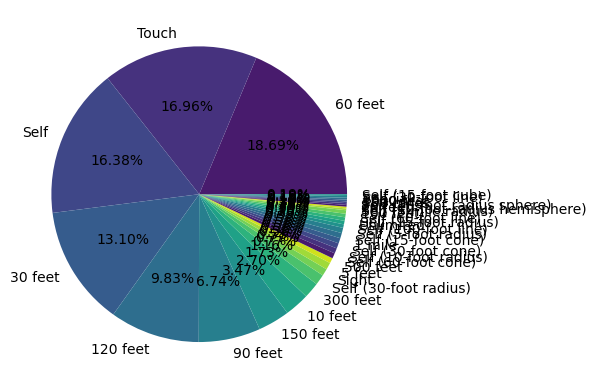

In [111]:
plt.pie(rg, labels=rg.index, colors=colors, autopct='%1.2f%%')

### 10 feet spells percentages

In [112]:
(14/519)*100

2.697495183044316

### 300 feet spells percentages

In [113]:
(9/519)*100

1.7341040462427744

### Self (30-foot radius) spells percentage

In [114]:
(6/519)*100

1.1560693641618496

### Sight and 5 feet spells percentages

In [115]:
(4/519)*100

0.7707129094412332

### 500 feet, Self (60-foot cone), Self (10-foot radius), Self (30-foot cone), 1 mile, Self (15-foot cone) and Self (5-foot radius) spells percentages

In [116]:
(3/519)*100

0.5780346820809248

### Self (100-foot line), Unlimited, Self (15-foot radius), Self (60-foot line) and 100 feet spells percentages

In [117]:
(2/519)*100

0.3853564547206166

### Self (5-mile radius), Self (10-foot-radius hemisphere), 20 feet, Self (10-foot radius sphere), 500 miles, 1000 feet, Special, Self (30-foot line) and Self (15-foot cube) spells percentages

In [118]:
(1/519)*100

0.1926782273603083

# Ritual spells

## Count

In [119]:
ritual = spells['ritual'].value_counts()
ritual

False    485
True      34
Name: ritual, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x22127352160>,
 [Text(-1.0767859069117283, 0.22479348450586187, 'Not ritual'),
  Text(1.0767859279584084, -0.22479338368988805, 'Ritual spells')],
 [Text(-0.5873377674063971, 0.12261462791228828, '93.45%'),
  Text(0.5873377788864046, -0.1226145729217571, '6.55%')])

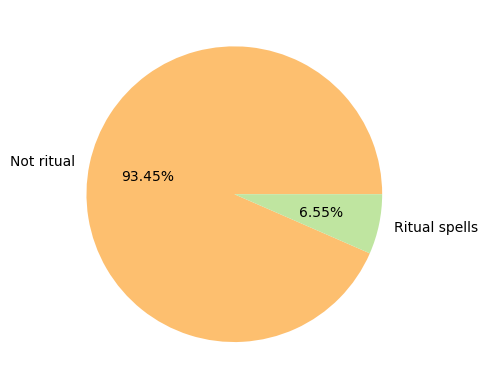

In [120]:
ritual_labels = ["Not ritual","Ritual spells"]

plt.pie(ritual, labels=ritual_labels, colors=two_colors, autopct='%1.2f%%')

# Spells at higher levels

In [121]:
cast_higher = spells[spells['cast_higher'] == True]
cast_higher

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
1,Absorb Elements,1,Abjuration,False,True,NaN,1 reaction,False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Xanathar's Guide to Everything
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"Sorcerer,Wizard",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"Artificer,Cleric,Paladin",Player's Handbook
5,Air Bubble,2,Conjuration,False,True,NaN,1 action,False,24 hours,60 feet,False,You create a spectral globe around the head of...,True,When you cast this spell using a spell slot of...,"Artificer,Druid,Ranger,Sorcerer,Wizard",Astral Adventurer's Guide
8,Animal Friendship,1,Enchantment,True,True,A morsel of food,1 action,False,24 hours,30 feet,False,This spell lets you convince a beast that you ...,True,When you cast this spell using a spell slot of...,"Bard,Druid,Ranger",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,Wall of Ice,6,Evocation,True,True,A small piece of quartz,1 action,True,Up to 10 minutes,120 feet,False,You create a wall of ice on a solid surface wi...,True,When you cast this spell using a spell slot of...,Wizard,Player's Handbook
494,Wall of Light,5,Evocation,True,True,A hand mirror,1 action,True,Up to 10 minutes,120 feet,False,A shimmering wall of bright Light appears at a...,True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Xanathar's Guide to Everything
497,Wall of Thorns,6,Conjuration,True,True,A handful of thorns,1 action,True,Up to 10 minutes,120 feet,False,"You create a wall of tough, pliable, tangled b...",True,When you cast this spell using a spell slot of...,Druid,Player's Handbook
510,Witch Bolt,1,Evocation,True,True,A twig from a tree that has been struck by lig...,1 action,True,Up to 1 minute,30 feet,False,"A beam of crackling, blue energy lances out to...",True,When you cast this spell using a spell slot of...,"Sorcerer,Warlock,Wizard",Player's Handbook


## Count

In [122]:
cast_higher_count = spells['cast_higher'].value_counts()
cast_higher_count

False    347
True     172
Name: cast_higher, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x22127638490>,
 [Text(-0.5557563544754619, 0.9492812409713703, 'False'),
  Text(0.5557564433535834, -0.9492811889377011, 'True')],
 [Text(-0.3031398297138883, 0.5177897678025656, '66.86%'),
  Text(0.30313987819286364, -0.5177897394205642, '33.14%')])

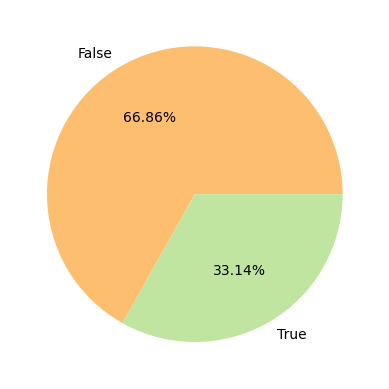

In [123]:
plt.pie(cast_higher_count, labels=cast_higher_count.index, colors=two_colors,
        autopct='%1.2f%%')

# Classes

## Turning the elements from the 'classes' column into lists

In [124]:
separate_classes(spells)
spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Abi-Dalzim's Horrid Wilting,8,Necromancy,True,True,A bit of sponge,1 action,False,Instantaneous,150 feet,False,You draw the moisture from every creature in a...,False,NaN,"[Sorcerer, Wizard]",Xanathar's Guide to Everything
1,Absorb Elements,1,Abjuration,False,True,NaN,1 reaction,False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"[Artificer, Druid, Ranger, Sorcerer, Wizard]",Xanathar's Guide to Everything
2,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"[Artificer, Sorcerer, Wizard]",Player's Handbook
3,Aganazzar's Scorcher,2,Evocation,True,True,A red dragon's scale,1 action,False,Instantaneous,30 feet,False,A line of roaring flame 30 feet long and 5 fee...,True,When you cast this spell using a spell slot of...,"[Sorcerer, Wizard]",Xanathar's Guide to Everything
4,Aid,2,Abjuration,True,True,A tiny strip of white cloth,1 action,False,8 hours,30 feet,False,Your spell bolsters your allies with toughness...,True,When you cast this spell using a spell slot of...,"[Artificer, Cleric, Paladin]",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Wrath of Nature,5,Evocation,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,You call out to the spirits of nature to rouse...,False,NaN,"[Druid, Ranger]",Xanathar's Guide to Everything
515,Wrathful Smite,1,Evocation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit with a melee weapon atta...,False,NaN,[Paladin],Player's Handbook
516,Wristpocket,2,Conjuration,False,True,NaN,1 action,True,Up to 1 hour,Self,True,"You flick your wrist, causing one object in yo...",False,NaN,[Wizard],Explorer's Guide to Wildemount
517,Zephyr Strike,1,Transmutation,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,"You move like the wind. Until the spell ends, ...",False,NaN,[Ranger],Xanathar's Guide to Everything


# Artificer Spells

In [125]:
artificer_spells = class_spells(spells,'Artificer')
artificer_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"[Artificer, Sorcerer, Wizard]",Player's Handbook
1,Booming Blade,0,Evocation,False,True,A melee weapon worth at least 1 sp,1 action,False,1 round,Self (5-foot radius),False,You brandish the weapon used in the spell's ca...,False,NaN,"[Artificer, Sorcerer, Warlock, Wizard]",Tasha's Cauldron of Everything
2,Create Bonfire,0,Conjuration,True,True,NaN,1 action,True,Up to 1 minute,60 feet,False,You create a bonfire on ground that you can se...,False,NaN,"[Artificer, Druid, Sorcerer, Warlock, Wizard]",Xanathar's Guide to Everything
3,Dancing Lights,0,Evocation,True,True,"A bit of phosphorus or wychwood, or a glowworm",1 action,True,Up to 1 minute,120 feet,False,You create up to four torch-sized lights withi...,False,NaN,"[Artificer, Bard, Sorcerer, Wizard]",Player's Handbook
4,Fire Bolt,0,Evocation,True,True,NaN,1 action,False,Instantaneous,120 feet,False,You hurl a mote of fire at a creature or objec...,False,NaN,"[Artificer, Sorcerer, Wizard]",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Creation,5,Illusion,True,True,A tiny piece of matter of the same type of the...,1 minute,False,Special,30 feet,False,You pull wisps of shadow material from the Sha...,True,When you cast this spell using a spell slot of...,"[Artificer, Sorcerer, Wizard]",Player's Handbook
96,Greater Restoration,5,Abjuration,True,True,"Diamond dust worth at least 100 gp, which the ...",1 action,False,Instantaneous,Touch,False,You imbue a creature you touch with positive e...,False,NaN,"[Artificer, Bard, Cleric, Druid]",Player's Handbook
97,Skill Empowerment,5,Transmutation,True,True,NaN,1 action,True,Up to 1 hour,Touch,False,Your magic deepens a creature's understanding ...,False,NaN,"[Artificer, Bard, Sorcerer, Wizard]",Xanathar's Guide to Everything
98,Transmute Rock,5,Transmutation,True,True,Clay and water,1 action,False,Until dispelled,120 feet,False,You choose an area of stone or mud that you ca...,False,NaN,"[Artificer, Druid, Wizard]",Xanathar's Guide to Everything


In [126]:
artificer_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           100 non-null    object
 1   level          100 non-null    int64 
 2   school         100 non-null    object
 3   V              100 non-null    bool  
 4   S              100 non-null    bool  
 5   M              54 non-null     object
 6   casting_time   100 non-null    object
 7   concentration  100 non-null    bool  
 8   duration       100 non-null    object
 9   range          100 non-null    object
 10  ritual         100 non-null    bool  
 11  description    100 non-null    object
 12  cast_higher    100 non-null    bool  
 13  higher_levels  27 non-null     object
 14  classes        100 non-null    object
 15  book           100 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 9.2+ KB


# Bard Spells

In [127]:
bard_spells = class_spells(spells,'Bard')
bard_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Blade Ward,0,Abjuration,True,True,NaN,1 action,False,1 round,Self,False,You extend your hand and trace a sigil of ward...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
1,Dancing Lights,0,Evocation,True,True,"A bit of phosphorus or wychwood, or a glowworm",1 action,True,Up to 1 minute,120 feet,False,You create up to four torch-sized lights withi...,False,NaN,"[Artificer, Bard, Sorcerer, Wizard]",Player's Handbook
2,Friends,0,Enchantment,False,True,A small amount of makeup applied to the face a...,1 action,True,Up to 1 minute,Self,False,"For the duration, you have advantage on all Ch...",False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
3,Light,0,Evocation,True,False,A firefly or phosphorescent moss,1 action,False,1 hour,Touch,False,You touch one object that is no larger than 10...,False,NaN,"[Artificer, Bard, Cleric, Sorcerer, Wizard]",Player's Handbook
4,Mage Hand,0,Conjuration,True,True,NaN,1 action,False,Up to 1 minute,30 feet,False,"A spectral, floating hand appears at a point y...",False,NaN,"[Artificer, Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Mass Polymorph,9,Transmutation,True,True,A caterpillar cocoon,1 action,True,Up to 1 hour,120 feet,False,You transform up to ten creatures of your choi...,False,NaN,"[Bard, Sorcerer, Wizard]",Xanathar's Guide to Everything
138,Power Word Heal,9,Evocation,True,False,NaN,1 action,False,Instantaneous,Touch,False,A wave of healing energy washes over the creat...,False,NaN,[Bard],Player's Handbook
139,Power Word Kill,9,Enchantment,True,False,NaN,1 action,False,Instantaneous,60 feet,False,You utter a word of power that can compel one ...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
140,Psychic Scream,9,Enchantment,False,True,NaN,1 action,False,Instantaneous,90 feet,False,You unleash the power of your mind to blast th...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Xanathar's Guide to Everything


In [128]:
bard_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           142 non-null    object
 1   level          142 non-null    int64 
 2   school         142 non-null    object
 3   V              142 non-null    bool  
 4   S              142 non-null    bool  
 5   M              77 non-null     object
 6   casting_time   142 non-null    object
 7   concentration  142 non-null    bool  
 8   duration       142 non-null    object
 9   range          142 non-null    object
 10  ritual         142 non-null    bool  
 11  description    142 non-null    object
 12  cast_higher    142 non-null    bool  
 13  higher_levels  40 non-null     object
 14  classes        142 non-null    object
 15  book           142 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 13.0+ KB


# Cleric Spells

In [129]:
cleric_spells = class_spells(spells,'Cleric')
cleric_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Guidance,0,Divination,True,True,NaN,1 action,True,Up to 1 minute,Touch,False,You touch one willing creature. Once before th...,False,NaN,"[Artificer, Cleric, Druid]",Player's Handbook
1,Light,0,Evocation,True,False,A firefly or phosphorescent moss,1 action,False,1 hour,Touch,False,You touch one object that is no larger than 10...,False,NaN,"[Artificer, Bard, Cleric, Sorcerer, Wizard]",Player's Handbook
2,Mending,0,Transmutation,True,True,Two lodestones,1 minute,False,Instantaneous,Touch,False,This spell repairs a single break or tear in a...,False,NaN,"[Artificer, Bard, Cleric, Druid, Sorcerer, Wiz...",Player's Handbook
3,Resistance,0,Abjuration,True,True,A miniature cloak,1 action,True,Up to 1 minute,Touch,False,You touch one willing creature. Once before th...,False,NaN,"[Artificer, Cleric, Druid]",Player's Handbook
4,Sacred Flame,0,Evocation,True,True,NaN,1 action,False,Instantaneous,60 feet,False,Flame-like radiance descends on a creature tha...,False,NaN,[Cleric],Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Holy Aura,8,Abjuration,True,True,A tiny reliquary worth at least 1000 gp contai...,1 action,True,Up to 1 minute,Self,False,Divine light washes out from you and coalesces...,False,NaN,[Cleric],Player's Handbook
113,Astral Projection,9,Necromancy,True,True,"For each creature you affect with this spell, ...",1 hour,False,Special,10 feet,False,You and up to eight willing creatures within r...,False,NaN,"[Cleric, Warlock, Wizard]",Player's Handbook
114,Gate,9,Conjuration,True,True,A diamond worth at least 5000 gp,1 action,True,Up to 1 minute,60 feet,False,You conjure a portal linking an unoccupied spa...,False,NaN,"[Cleric, Sorcerer, Wizard]",Player's Handbook
115,Mass Heal,9,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,A flood of healing energy flows from you into ...,False,NaN,[Cleric],Player's Handbook


In [130]:
cleric_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           117 non-null    object
 1   level          117 non-null    int64 
 2   school         117 non-null    object
 3   V              117 non-null    bool  
 4   S              117 non-null    bool  
 5   M              68 non-null     object
 6   casting_time   117 non-null    object
 7   concentration  117 non-null    bool  
 8   duration       117 non-null    object
 9   range          117 non-null    object
 10  ritual         117 non-null    bool  
 11  description    117 non-null    object
 12  cast_higher    117 non-null    bool  
 13  higher_levels  34 non-null     object
 14  classes        117 non-null    object
 15  book           117 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 10.8+ KB


# Druid Spells

In [131]:
druid_spells = class_spells(spells,'Druid')
druid_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Control Flames,0,Transmutation,False,True,NaN,1 action,False,Instantaneous or 1 hour (see description),60 feet,False,You choose a nonmagical flame that you can see...,False,NaN,"[Druid, Sorcerer, Wizard]",Xanathar's Guide to Everything
1,Create Bonfire,0,Conjuration,True,True,NaN,1 action,True,Up to 1 minute,60 feet,False,You create a bonfire on ground that you can se...,False,NaN,"[Artificer, Druid, Sorcerer, Warlock, Wizard]",Xanathar's Guide to Everything
2,Druidcraft,0,Transmutation,True,True,NaN,1 action,False,Instantaneous,30 feet,False,"Whispering to the spirits of nature, you creat...",False,NaN,[Druid],Player's Handbook
3,Frostbite,0,Evocation,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You cause numbing frost to form on one creatur...,False,NaN,"[Artificer, Druid, Sorcerer, Warlock, Wizard]",Xanathar's Guide to Everything
4,Guidance,0,Divination,True,True,NaN,1 action,True,Up to 1 minute,Touch,False,You touch one willing creature. Once before th...,False,NaN,"[Artificer, Cleric, Druid]",Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Tsunami,8,Conjuration,True,True,NaN,1 minute,True,Up to 6 rounds,Sight,False,A wall of water springs into existence at a po...,False,NaN,[Druid],Player's Handbook
154,Foresight,9,Divination,True,True,A hummingbird feather,1 minute,False,8 hours,Touch,False,You touch a willing creature and bestow a limi...,False,NaN,"[Bard, Druid, Warlock, Wizard]",Player's Handbook
155,Shapechange,9,Transmutation,True,True,"A jade circlet worth at least 1500 gp, which y...",1 action,True,Up to 1 hour,Self,False,You assume the form of a different creature fo...,False,NaN,"[Druid, Wizard]",Player's Handbook
156,Storm of Vengeance,9,Conjuration,True,True,NaN,1 action,True,Up to 1 minute,Sight,False,"A churning storm cloud forms, centered on a po...",False,NaN,[Druid],Player's Handbook


In [132]:
druid_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           158 non-null    object
 1   level          158 non-null    int64 
 2   school         158 non-null    object
 3   V              158 non-null    bool  
 4   S              158 non-null    bool  
 5   M              85 non-null     object
 6   casting_time   158 non-null    object
 7   concentration  158 non-null    bool  
 8   duration       158 non-null    object
 9   range          158 non-null    object
 10  ritual         158 non-null    bool  
 11  description    158 non-null    object
 12  cast_higher    158 non-null    bool  
 13  higher_levels  48 non-null     object
 14  classes        158 non-null    object
 15  book           158 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 14.5+ KB


# Paladin Spells

In [133]:
paladin_spells = class_spells(spells,'Paladin')
paladin_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Bless,1,Enchantment,True,True,A sprinkling of holy water,1 action,True,Up to 1 minute,30 feet,False,You bless up to three creatures of your choice...,True,When you cast this spell using a spell slot of...,"[Cleric, Paladin]",Player's Handbook
1,Ceremony,1,Abjuration,True,True,"25 gp worth of powdered silver, which the spel...",1 hour,False,Instantaneous,Touch,True,You perform a special religious ceremony that ...,False,NaN,"[Cleric, Paladin]",Xanathar's Guide to Everything
2,Command,1,Enchantment,True,False,NaN,1 action,False,1 round,60 feet,False,You speak a one-word command to a creature you...,True,When you cast this spell using a spell slot of...,"[Cleric, Paladin]",Player's Handbook
3,Compelled Duel,1,Enchantment,True,False,NaN,1 bonus action,True,Up to 1 minute,30 feet,False,You attempt to compel a creature into a duel. ...,False,NaN,[Paladin],Player's Handbook
4,Cure Wounds,1,Evocation,True,True,NaN,1 action,False,Instantaneous,Touch,False,A creature you touch regains a number of hit p...,True,When you cast this spell using a spell slot of...,"[Artificer, Bard, Cleric, Druid, Paladin, Ranger]",Player's Handbook
5,Detect Evil and Good,1,Divination,True,True,NaN,1 action,True,Up to 10 minutes,Self,False,"For the duration, you know if there is an aber...",False,NaN,"[Cleric, Paladin]",Player's Handbook
6,Detect Magic,1,Divination,True,True,NaN,1 action,True,Up to 10 minutes,Self,True,"For the duration, you sense the presence of ma...",False,NaN,"[Artificer, Bard, Cleric, Druid, Paladin, Rang...",Player's Handbook
7,Detect Poison and Disease,1,Divination,True,True,A yew leaf,1 action,True,Up to 10 minutes,Self,True,"For the duration, you can sense the presence a...",False,NaN,"[Cleric, Druid, Paladin, Ranger]",Player's Handbook
8,Divine Favor,1,Evocation,True,True,NaN,1 bonus action,True,Up to 1 minute,Self,False,Your prayer empowers you with divine radiance...,False,NaN,[Paladin],Player's Handbook
9,Heroism,1,Enchantment,True,True,NaN,1 action,True,Up to 1 minute,Touch,False,A willing creature you touch is imbued with br...,True,When you cast this spell using a spell slot of...,"[Bard, Paladin]",Player's Handbook


In [134]:
paladin_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           50 non-null     object
 1   level          50 non-null     int64 
 2   school         50 non-null     object
 3   V              50 non-null     bool  
 4   S              50 non-null     bool  
 5   M              14 non-null     object
 6   casting_time   50 non-null     object
 7   concentration  50 non-null     bool  
 8   duration       50 non-null     object
 9   range          50 non-null     object
 10  ritual         50 non-null     bool  
 11  description    50 non-null     object
 12  cast_higher    50 non-null     bool  
 13  higher_levels  15 non-null     object
 14  classes        50 non-null     object
 15  book           50 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 4.7+ KB


# Ranger Spells

In [135]:
ranger_spells = class_spells(spells,'Ranger')
ranger_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Absorb Elements,1,Abjuration,False,True,NaN,1 reaction,False,1 round,Self,False,The spell captures some of the incoming energy...,True,When you cast this spell using a spell slot of...,"[Artificer, Druid, Ranger, Sorcerer, Wizard]",Xanathar's Guide to Everything
1,Alarm,1,Abjuration,True,True,A tiny bell and a piece of fine silver wire,1 minute,False,8 hours,30 feet,True,You set an alarm against unwanted intrusion. C...,False,NaN,"[Artificer, Ranger, Wizard]",Player's Handbook
2,Animal Friendship,1,Enchantment,True,True,A morsel of food,1 action,False,24 hours,30 feet,False,This spell lets you convince a beast that you ...,True,When you cast this spell using a spell slot of...,"[Bard, Druid, Ranger]",Player's Handbook
3,Beast Bond,1,Divination,True,True,A bit of fur wrapped in a cloth,1 action,True,Up to 10 minutes,Touch,False,You establish a telepathic link with one beast...,False,NaN,"[Druid, Ranger]",Xanathar's Guide to Everything
4,Cure Wounds,1,Evocation,True,True,NaN,1 action,False,Instantaneous,Touch,False,A creature you touch regains a number of hit p...,True,When you cast this spell using a spell slot of...,"[Artificer, Bard, Cleric, Druid, Paladin, Ranger]",Player's Handbook
5,Detect Magic,1,Divination,True,True,NaN,1 action,True,Up to 10 minutes,Self,True,"For the duration, you sense the presence of ma...",False,NaN,"[Artificer, Bard, Cleric, Druid, Paladin, Rang...",Player's Handbook
6,Detect Poison and Disease,1,Divination,True,True,A yew leaf,1 action,True,Up to 10 minutes,Self,True,"For the duration, you can sense the presence a...",False,NaN,"[Cleric, Druid, Paladin, Ranger]",Player's Handbook
7,Ensnaring Strike,1,Conjuration,True,False,NaN,1 bonus action,True,Up to 1 minute,Self,False,The next time you hit a creature with a weapon...,True,If you cast this spell using a spell slot of 2...,[Ranger],Player's Handbook
8,Fog Cloud,1,Conjuration,True,True,NaN,1 action,True,Up to 1 hour,120 feet,False,You create a 20-foot-radius sphere of fog cent...,True,When you cast this spell using a spell slot of...,"[Druid, Ranger, Sorcerer, Wizard]",Player's Handbook
9,Goodberry,1,Transmutation,True,True,A sprig of mistletoe,1 action,False,Instantaneous,Touch,False,Up to ten berries appear in your hand and are ...,False,NaN,"[Druid, Ranger]",Player's Handbook


In [136]:
ranger_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           60 non-null     object
 1   level          60 non-null     int64 
 2   school         60 non-null     object
 3   V              60 non-null     bool  
 4   S              60 non-null     bool  
 5   M              31 non-null     object
 6   casting_time   60 non-null     object
 7   concentration  60 non-null     bool  
 8   duration       60 non-null     object
 9   range          60 non-null     object
 10  ritual         60 non-null     bool  
 11  description    60 non-null     object
 12  cast_higher    60 non-null     bool  
 13  higher_levels  20 non-null     object
 14  classes        60 non-null     object
 15  book           60 non-null     object
dtypes: bool(5), int64(1), object(10)
memory usage: 5.6+ KB


# Sorcerer Spells

In [137]:
sorcerer_spells = class_spells(spells,'Sorcerer')
sorcerer_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"[Artificer, Sorcerer, Wizard]",Player's Handbook
1,Blade Ward,0,Abjuration,True,True,NaN,1 action,False,1 round,Self,False,You extend your hand and trace a sigil of ward...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
2,Booming Blade,0,Evocation,False,True,A melee weapon worth at least 1 sp,1 action,False,1 round,Self (5-foot radius),False,You brandish the weapon used in the spell's ca...,False,NaN,"[Artificer, Sorcerer, Warlock, Wizard]",Tasha's Cauldron of Everything
3,Chill Touch,0,Necromancy,True,True,NaN,1 action,False,1 round,120 feet,False,"You create a ghostly, skeletal hand in the spa...",False,NaN,"[Sorcerer, Warlock, Wizard]",Player's Handbook
4,Control Flames,0,Transmutation,False,True,NaN,1 action,False,Instantaneous or 1 hour (see description),60 feet,False,You choose a nonmagical flame that you can see...,False,NaN,"[Druid, Sorcerer, Wizard]",Xanathar's Guide to Everything
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Meteor Swarm,9,Evocation,True,True,NaN,1 action,False,Instantaneous,1 mile,False,Blazing orbs of fire plummet to the ground at ...,False,NaN,"[Sorcerer, Wizard]",Player's Handbook
205,Power Word Kill,9,Enchantment,True,False,NaN,1 action,False,Instantaneous,60 feet,False,You utter a word of power that can compel one ...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
206,Psychic Scream,9,Enchantment,False,True,NaN,1 action,False,Instantaneous,90 feet,False,You unleash the power of your mind to blast th...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Xanathar's Guide to Everything
207,Time Stop,9,Transmutation,True,False,NaN,1 action,False,Instantaneous,Self,False,You briefly stop the flow of time for everyone...,False,NaN,"[Sorcerer, Wizard]",Player's Handbook


In [138]:
sorcerer_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           209 non-null    object
 1   level          209 non-null    int64 
 2   school         209 non-null    object
 3   V              209 non-null    bool  
 4   S              209 non-null    bool  
 5   M              103 non-null    object
 6   casting_time   209 non-null    object
 7   concentration  209 non-null    bool  
 8   duration       209 non-null    object
 9   range          209 non-null    object
 10  ritual         209 non-null    bool  
 11  description    209 non-null    object
 12  cast_higher    209 non-null    bool  
 13  higher_levels  77 non-null     object
 14  classes        209 non-null    object
 15  book           209 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 19.1+ KB


# Warlock Spells

In [139]:
warlock_spells = class_spells(spells,'Warlock')
warlock_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Blade Ward,0,Abjuration,True,True,NaN,1 action,False,1 round,Self,False,You extend your hand and trace a sigil of ward...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
1,Booming Blade,0,Evocation,False,True,A melee weapon worth at least 1 sp,1 action,False,1 round,Self (5-foot radius),False,You brandish the weapon used in the spell's ca...,False,NaN,"[Artificer, Sorcerer, Warlock, Wizard]",Tasha's Cauldron of Everything
2,Chill Touch,0,Necromancy,True,True,NaN,1 action,False,1 round,120 feet,False,"You create a ghostly, skeletal hand in the spa...",False,NaN,"[Sorcerer, Warlock, Wizard]",Player's Handbook
3,Create Bonfire,0,Conjuration,True,True,NaN,1 action,True,Up to 1 minute,60 feet,False,You create a bonfire on ground that you can se...,False,NaN,"[Artificer, Druid, Sorcerer, Warlock, Wizard]",Xanathar's Guide to Everything
4,Eldritch Blast,0,Evocation,True,True,NaN,1 action,False,Instantaneous,120 feet,False,A beam of crackling energy streaks toward a cr...,False,NaN,[Warlock],Player's Handbook
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Foresight,9,Divination,True,True,A hummingbird feather,1 minute,False,8 hours,Touch,False,You touch a willing creature and bestow a limi...,False,NaN,"[Bard, Druid, Warlock, Wizard]",Player's Handbook
127,Imprisonment,9,Abjuration,True,True,A vellum depiction or a carved statuette in lh...,1 minute,False,Until dispelled,30 feet,False,You create a magical restraint to hold a creat...,False,NaN,"[Warlock, Wizard]",Player's Handbook
128,Power Word Kill,9,Enchantment,True,False,NaN,1 action,False,Instantaneous,60 feet,False,You utter a word of power that can compel one ...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
129,Psychic Scream,9,Enchantment,False,True,NaN,1 action,False,Instantaneous,90 feet,False,You unleash the power of your mind to blast th...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Xanathar's Guide to Everything


In [140]:
warlock_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           131 non-null    object
 1   level          131 non-null    int64 
 2   school         131 non-null    object
 3   V              131 non-null    bool  
 4   S              131 non-null    bool  
 5   M              62 non-null     object
 6   casting_time   131 non-null    object
 7   concentration  131 non-null    bool  
 8   duration       131 non-null    object
 9   range          131 non-null    object
 10  ritual         131 non-null    bool  
 11  description    131 non-null    object
 12  cast_higher    131 non-null    bool  
 13  higher_levels  49 non-null     object
 14  classes        131 non-null    object
 15  book           131 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 12.0+ KB


# Wizard Spells

In [141]:
wizard_spells = class_spells(spells,'Wizard')
wizard_spells

,name,level,school,V,S,M,casting_time,concentration,duration,range,ritual,description,cast_higher,higher_levels,classes,book
0,Acid Splash,0,Conjuration,True,True,NaN,1 action,False,Instantaneous,60 feet,False,You hurl a bubble of acid. Choose one creature...,False,NaN,"[Artificer, Sorcerer, Wizard]",Player's Handbook
1,Blade Ward,0,Abjuration,True,True,NaN,1 action,False,1 round,Self,False,You extend your hand and trace a sigil of ward...,False,NaN,"[Bard, Sorcerer, Warlock, Wizard]",Player's Handbook
2,Booming Blade,0,Evocation,False,True,A melee weapon worth at least 1 sp,1 action,False,1 round,Self (5-foot radius),False,You brandish the weapon used in the spell's ca...,False,NaN,"[Artificer, Sorcerer, Warlock, Wizard]",Tasha's Cauldron of Everything
3,Chill Touch,0,Necromancy,True,True,NaN,1 action,False,1 round,120 feet,False,"You create a ghostly, skeletal hand in the spa...",False,NaN,"[Sorcerer, Warlock, Wizard]",Player's Handbook
4,Control Flames,0,Transmutation,False,True,NaN,1 action,False,Instantaneous or 1 hour (see description),60 feet,False,You choose a nonmagical flame that you can see...,False,NaN,"[Druid, Sorcerer, Wizard]",Xanathar's Guide to Everything
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Time Ravage,9,Necromancy,True,True,An hourglass filled with diamond dust worth at...,1 action,False,Instantaneous,90 feet,False,You target a creature you can see within range...,False,NaN,[Wizard],Explorer's Guide to Wildemount
344,Time Stop,9,Transmutation,True,False,NaN,1 action,False,Instantaneous,Self,False,You briefly stop the flow of time for everyone...,False,NaN,"[Sorcerer, Wizard]",Player's Handbook
345,True Polymorph,9,Transmutation,True,True,"A drop of mercury, a dollop of gum arabic, and...",1 action,True,Up to 1 hour,30 feet,False,Choose one creature or nonmagical object that ...,False,NaN,"[Bard, Warlock, Wizard]",Player's Handbook
346,Weird,9,Illusion,True,True,NaN,1 action,True,Up to 1 minute,120 feet,False,Drawing on the deepest fears of a group of cre...,False,NaN,[Wizard],Player's Handbook


In [142]:
wizard_spells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           348 non-null    object
 1   level          348 non-null    int64 
 2   school         348 non-null    object
 3   V              348 non-null    bool  
 4   S              348 non-null    bool  
 5   M              208 non-null    object
 6   casting_time   348 non-null    object
 7   concentration  348 non-null    bool  
 8   duration       348 non-null    object
 9   range          348 non-null    object
 10  ritual         348 non-null    bool  
 11  description    348 non-null    object
 12  cast_higher    348 non-null    bool  
 13  higher_levels  122 non-null    object
 14  classes        348 non-null    object
 15  book           348 non-null    object
dtypes: bool(5), int64(1), object(10)
memory usage: 31.7+ KB


# Books

## Count

In [143]:
books = spells['book'].value_counts()
books

Player's Handbook                        361
Xanathar's Guide to Everything            95
Tasha's Cauldron of Everything            21
Explorer's Guide to Wildemount            15
Fizban's Treasury of Dragons               7
Acquisitions Incorporated                  7
Strixhaven: A Curriculum of Chaos          5
Lost Laboratory of Kwalish                 3
Astral Adventurer's Guide                  2
Icewind Dale: Rime of the Frostmaiden      2
Guildmaster's Guide to Ravnica             1
Name: book, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x22127556ee0>,
 [Text(-0.634111769317421, 0.8988338355965079, "Player's Handbook"),
  Text(0.2540372613264735, -1.0702640187625412, "Xanathar's Guide to Everything"),
  Text(0.8851986667977139, -0.6530109649152533, "Tasha's Cauldron of Everything"),
  Text(1.005440858055582, -0.446193546515921, "Explorer's Guide to Wildemount"),
  Text(1.0557826653331748, -0.30874417173766633, "Fizban's Treasury of Dragons"),
  Text(1.0781268364957586, -0.2182716757338157, 'Acquisitions Incorporated'),
  Text(1.0911247145512495, -0.13945198921297053, 'Strixhaven: A Curriculum of Chaos'),
  Text(1.0965959827717846, -0.08647109672476656, 'Lost Laboratory of Kwalish'),
  Text(1.0987104886377932, -0.05324717980608941, "Astral Adventurer's Guide"),
  Text(1.0996775731721362, -0.026631467519477137, 'Icewind Dale: Rime of the Frostmaiden'),
  Text(1.0999798467500517, -0.006658584213879165, "Guildmaster's Guide to Ravnica")],
 [Text(-0.34587914690041144, 0.49027300123445877, '69

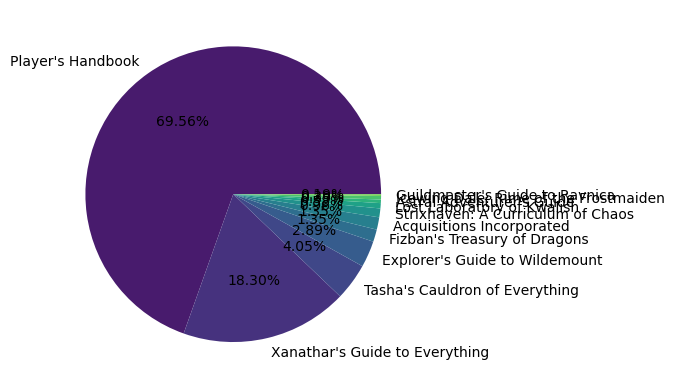

In [144]:
plt.pie(books, labels=books.index, colors=colors, autopct='%1.2f%%')

### Strixhaven percentage

In [145]:
(5/519)*100

0.9633911368015413

### Lost Lab percentage

In [146]:
(3/519)*100

0.5780346820809248

### AAG and Icewind Dale percentages

In [147]:
(2/519)*100

0.3853564547206166

### Ravnica percentage

In [148]:
(1/519)*100

0.1926782273603083

# Analysis of the spells' descriptions

## Joining the text from all spells

In [149]:
text = ' '.join(spells['description'])

## Creating a wordcloud

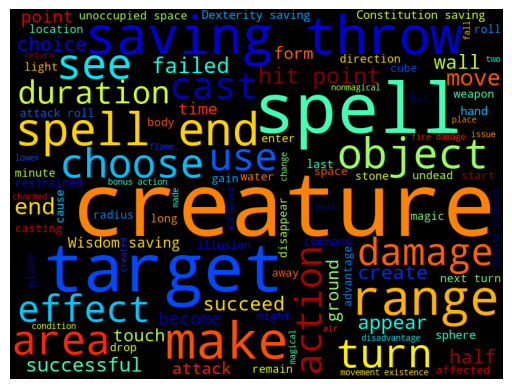

In [150]:
additional_stopwords = ['must','within','one','foot','feet','DM',
                        'takes','take','much','save','DC']


wc = WordCloud(background_color='black',stopwords=set(list(STOPWORDS)+additional_stopwords),
               height=600,width=800,min_font_size=5,max_words=100,
               colormap=plt.get_cmap("jet"),random_state=None)

wc.generate(text)
wc.to_file("spell_descriptions.png")
plt.imshow(wc)
plt.axis("off")
plt.show()

![alt text](gravity-falls-wordcloud.png "Worthless Wordcloud")

# As you can see, I tried to use a color gradient for the wordcloud object, thinking that it would do the obvious thing and attribute the colors of the gradient according to the frequency of the words. But it didn't. The colors were all assigned randomly.

# Therefore, I will use nltk to analyze the spell descriptions.

In [150]:
import nltk
# nltk.download('punkt')
# Run the line above if you get an error (just remove the '#' and the space)

## Tokenizing the words

In [151]:
from nltk.tokenize import word_tokenize

words = word_tokenize(text)
words

['You',
 'draw',
 'the',
 'moisture',
 'from',
 'every',
 'creature',
 'in',
 'a',
 '30-foot',
 'cube',
 'centered',
 'on',
 'a',
 'point',
 'you',
 'choose',
 'within',
 'range',
 '.',
 'Each',
 'creature',
 'in',
 'that',
 'area',
 'must',
 'make',
 'a',
 'Constitution',
 'saving',
 'throw',
 '.',
 'Constructs',
 'and',
 'undead',
 'are',
 "n't",
 'affected',
 ',',
 'and',
 'plants',
 'and',
 'water',
 'elementals',
 'make',
 'this',
 'saving',
 'throw',
 'with',
 'disadvantage',
 '.',
 'A',
 'creature',
 'takes',
 '12d8',
 'necrotic',
 'damage',
 'on',
 'a',
 'failed',
 'save',
 ',',
 'or',
 'half',
 'as',
 'much',
 'damage',
 'on',
 'a',
 'successful',
 'one',
 '.',
 'Nonmagical',
 'plants',
 'in',
 'the',
 'area',
 'that',
 'are',
 "n't",
 'creatures',
 ',',
 'such',
 'as',
 'trees',
 'and',
 'shrubs',
 ',',
 'wither',
 'and',
 'die',
 'instantly',
 '.',
 'The',
 'spell',
 'captures',
 'some',
 'of',
 'the',
 'incoming',
 'energy',
 ',',
 'lessening',
 'its',
 'effect',
 'on',
 'y

## Setting the stopwords

In [152]:
# nltk.download("stopwords")
# Same thing here as last time

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

## Adding stopwords that are specifically related to D&D

In [153]:
additional_stopwords = ['must','within','one','foot','feet','DM',
                        'takes','take','much','save','DC','.','wo',
                        "n't",',',"'s","(",")",'ca',';',':']

spells_stopwords = set(list(stop_words)+additional_stopwords)

## Filtering out the stopwords

In [154]:
filtered_list = []

for word in words:
    if word.casefold() not in spells_stopwords:
        filtered_list.append(word)

filtered_list

['draw',
 'moisture',
 'every',
 'creature',
 '30-foot',
 'cube',
 'centered',
 'point',
 'choose',
 'range',
 'creature',
 'area',
 'make',
 'Constitution',
 'saving',
 'throw',
 'Constructs',
 'undead',
 'affected',
 'plants',
 'water',
 'elementals',
 'make',
 'saving',
 'throw',
 'disadvantage',
 'creature',
 '12d8',
 'necrotic',
 'damage',
 'failed',
 'half',
 'damage',
 'successful',
 'Nonmagical',
 'plants',
 'area',
 'creatures',
 'trees',
 'shrubs',
 'wither',
 'die',
 'instantly',
 'spell',
 'captures',
 'incoming',
 'energy',
 'lessening',
 'effect',
 'storing',
 'next',
 'melee',
 'attack',
 'resistance',
 'triggering',
 'damage',
 'type',
 'start',
 'next',
 'turn',
 'Also',
 'first',
 'time',
 'hit',
 'melee',
 'attack',
 'next',
 'turn',
 'target',
 'extra',
 '1d6',
 'damage',
 'triggering',
 'type',
 'spell',
 'ends',
 'hurl',
 'bubble',
 'acid',
 'Choose',
 'creature',
 'range',
 'choose',
 'two',
 'creatures',
 'range',
 '5',
 'target',
 'succeed',
 'Dexterity',
 'sav

## Finding the frequency of the words

In [155]:
from nltk import FreqDist

frequency_distribution = FreqDist(filtered_list)
print(frequency_distribution)

<FreqDist with 4358 samples and 33601 outcomes>


## Finding the 20 most common words (recommended number for visualization)

In [156]:
most_common = frequency_distribution.most_common(20)
most_common

[('creature', 1248),
 ('spell', 1152),
 ('target', 683),
 ('damage', 536),
 ('ends', 389),
 ('saving', 387),
 ('throw', 356),
 ('range', 336),
 ('make', 290),
 ('area', 270),
 ('see', 265),
 ('action', 248),
 ('hit', 247),
 ('duration', 230),
 ('turn', 223),
 ('creatures', 221),
 ('object', 213),
 ('cast', 200),
 ('attack', 195),
 ('use', 178)]

## Turning the list of tuples into a DataFrame

In [157]:
words_data = pd.DataFrame(most_common)
words_data

,0,1
0,creature,1248
1,spell,1152
2,target,683
3,damage,536
4,ends,389
5,saving,387
6,throw,356
7,range,336
8,make,290
9,area,270


## Visualization

Text(0.5, 0, 'Count')

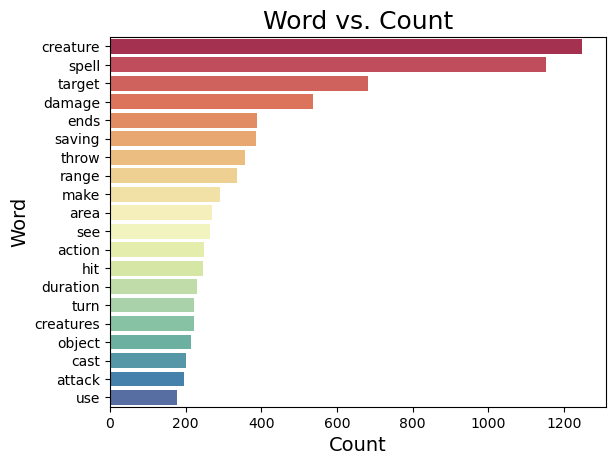

In [158]:
ax = sns.barplot(words_data,x=1,y=0,palette="Spectral")
ax.axes.set_title("Word vs. Count",fontsize=18)
ax.set_ylabel("Word",fontsize=14)
ax.set_xlabel("Count",fontsize=14)

### Using log scale for the x axis

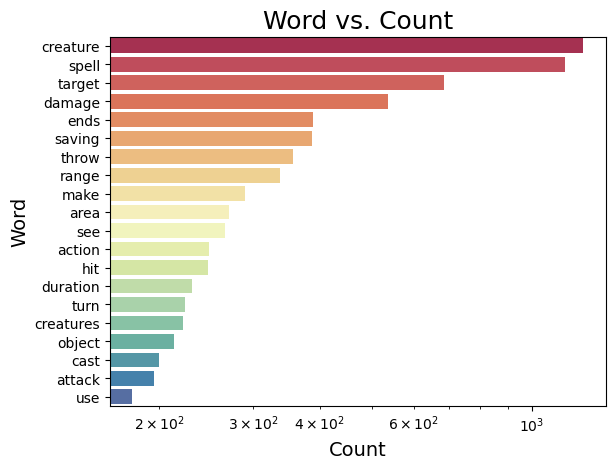

In [159]:
ax_log = sns.barplot(words_data,x=1,y=0,palette="Spectral")
ax_log.axes.set_title("Word vs. Count",fontsize=18)
ax_log.set_ylabel("Word",fontsize=14)
ax_log.set_xlabel("Count",fontsize=14)
ax_log.set_xscale("log")